In [1]:
import random 
import warnings
import numpy as np 
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
VAR_SEED = 42
VAR_TESTSET_SIZE = 0.20
VAR_DIR_DATA_CLEANING = '../data/cleaning'

random.seed(VAR_SEED)
np.random.seed(VAR_SEED)
warnings.filterwarnings("ignore")

In [35]:
EJERCICIOS = pd.read_csv(f"{VAR_DIR_DATA_CLEANING}/ejercicios.csv", encoding="latin1")
ESTUDIANTES = pd.read_csv(f"{VAR_DIR_DATA_CLEANING}/estudiantes.csv", encoding="latin1")

df_items = EJERCICIOS[['id_ejercicio','h1', 'h2', 'h3', 'h4', 's1', 's2', 's3', 's4', 'k1', 'k2', 'k3', 'k4']]
df_users = ESTUDIANTES[['id_estudiante', 'programa', 'exitosos', 'fallidos', 'solemne_1',
       'solemne_2', 'solemne_3', 'solemne_4', 'score_a', 'score_p', 'score_d',
       'score_s', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29',
       'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39',
       'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49',
       'e50', 'e51', 'e52']]

In [4]:
# División inicial en train y test
train_data, test_data = train_test_split(df_users, test_size=VAR_TESTSET_SIZE, random_state=VAR_SEED)
# División adicional en train y validation
train_data, validation_data = train_test_split(train_data, test_size=VAR_TESTSET_SIZE, random_state=VAR_SEED)

In [5]:
# Crear escalador
scaler = MinMaxScaler()

# Columnas a normalizar
columns_to_normalize = ['exitosos', 'fallidos', 'solemne_1', 'solemne_2', 'solemne_3', 'solemne_4', 'score_a', 'score_p', 'score_d', 'score_s']

# Ajustar el escalador en el conjunto de entrenamiento
scaler.fit(train_data[columns_to_normalize])  # Ajustar el escalador

# Normalización
train_data[columns_to_normalize] = scaler.transform(train_data[columns_to_normalize])
validation_data[columns_to_normalize] = scaler.transform(validation_data[columns_to_normalize])
test_data[columns_to_normalize] = scaler.transform(test_data[columns_to_normalize])


In [6]:
# One-Hot Encoding para la variable 'programa'
# Obtener todas las categorías del conjunto de entrenamiento
all_categories = pd.get_dummies(train_data['programa'], drop_first=False).columns

# Generar dummies en cada conjunto y convertirlas a int
train_program_dummies = pd.get_dummies(train_data['programa'], drop_first=False).reindex(columns=all_categories, fill_value=0).astype(int)
validation_program_dummies = pd.get_dummies(validation_data['programa'], drop_first=False).reindex(columns=all_categories, fill_value=0).astype(int)
test_program_dummies = pd.get_dummies(test_data['programa'], drop_first=False).reindex(columns=all_categories, fill_value=0).astype(int)

# Reemplazar la columna original 'programa' con las nuevas columnas
train_data = train_data.drop(columns=['programa']).join(train_program_dummies)
validation_data = validation_data.drop(columns=['programa']).join(validation_program_dummies)
test_data = test_data.drop(columns=['programa']).join(test_program_dummies)

In [7]:
train_data

,id_estudiante,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,score_a,score_p,score_d,...,e48,e49,e50,e51,e52,BACHILLERATO EN CIENCIAS,INGENIERIA CIVIL INDUSTRIAL,INGENIERIA CIVIL INFORMATICA,INGENIERIA EN COMPUTACION E INFORMATICA,INGENIERIA INDUSTRIAL
1004,1203,0.086957,0.261905,0.833333,0.142857,0.000000,0.000000,0.125,0.2,0.25,...,0,0,0,0,0,0,0,1,0,0
93,104,0.108696,0.238095,0.916667,0.142857,0.450000,0.450000,0.250,0.2,0.25,...,0,0,0,0,0,0,0,0,1,0
727,898,0.282609,0.047619,0.450000,0.142857,0.000000,0.000000,0.125,0.2,0.25,...,0,0,0,0,0,0,1,0,0,0
814,992,0.239130,0.452381,0.566667,0.142857,0.000000,0.000000,0.125,0.2,0.25,...,0,0,0,0,0,0,0,1,0,0
796,974,0.282609,0.404762,0.550000,0.142857,0.000000,0.000000,0.125,0.2,0.25,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,463,0.565217,0.285714,0.750000,0.828571,0.800000,0.783333,0.500,0.4,0.25,...,0,0,0,0,0,0,0,0,1,0
251,281,0.500000,0.357143,0.966667,1.000000,0.933333,0.966667,0.750,0.8,0.75,...,0,0,0,0,0,0,1,0,0,0
955,1151,0.282609,0.047619,0.750000,0.142857,0.000000,0.000000,0.125,0.2,0.25,...,0,0,0,0,0,0,0,1,0,0
195,216,0.347826,0.333333,0.733333,0.857143,0.750000,0.766667,0.500,0.8,0.25,...,0,0,0,0,0,0,1,0,0,0


In [8]:
columnas_interacciones = [f"e{i}" for i in range(len(df_items))]

df_test_interacciones = test_data[['id_estudiante'] + columnas_interacciones]
df_train_interacciones = train_data[['id_estudiante'] + columnas_interacciones]
df_validation_interacciones = validation_data[['id_estudiante'] + columnas_interacciones]

df_test_users = test_data.drop(columns=columnas_interacciones)
df_train_users = train_data.drop(columns=columnas_interacciones)
df_validation_users = validation_data.drop(columns=columnas_interacciones)


In [9]:
df_train_users

,id_estudiante,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,score_a,score_p,score_d,score_s,BACHILLERATO EN CIENCIAS,INGENIERIA CIVIL INDUSTRIAL,INGENIERIA CIVIL INFORMATICA,INGENIERIA EN COMPUTACION E INFORMATICA,INGENIERIA INDUSTRIAL
1004,1203,0.086957,0.261905,0.833333,0.142857,0.000000,0.000000,0.125,0.2,0.25,0.25,0,0,1,0,0
93,104,0.108696,0.238095,0.916667,0.142857,0.450000,0.450000,0.250,0.2,0.25,0.50,0,0,0,1,0
727,898,0.282609,0.047619,0.450000,0.142857,0.000000,0.000000,0.125,0.2,0.25,0.25,0,1,0,0,0
814,992,0.239130,0.452381,0.566667,0.142857,0.000000,0.000000,0.125,0.2,0.25,0.25,0,0,1,0,0
796,974,0.282609,0.404762,0.550000,0.142857,0.000000,0.000000,0.125,0.2,0.25,0.25,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,463,0.565217,0.285714,0.750000,0.828571,0.800000,0.783333,0.500,0.4,0.25,0.50,0,0,0,1,0
251,281,0.500000,0.357143,0.966667,1.000000,0.933333,0.966667,0.750,0.8,0.75,0.50,0,1,0,0,0
955,1151,0.282609,0.047619,0.750000,0.142857,0.000000,0.000000,0.125,0.2,0.25,0.25,0,0,1,0,0
195,216,0.347826,0.333333,0.733333,0.857143,0.750000,0.766667,0.500,0.8,0.25,0.50,0,1,0,0,0


In [30]:
df_train_interacciones

,id_estudiante,e0,e1,e2,e3,e4,e5,e6,e7,e8,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
1004,1203,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,104,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,898,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
814,992,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,974,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,463,1,1,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
251,281,1,1,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
955,1151,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
195,216,1,1,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:

# # Filtrar estudiantes aprobados según las condiciones
estudiantes_aprovados = ESTUDIANTES[~ESTUDIANTES['id_estudiante'].isin(ESTUDIANTES.query("`solemne_1` < 4.0 and `solemne_2` < 4.0 and `solemne_3` < 4.0 and `solemne_4` < 4.0")['id_estudiante'])]

# Total de ítems
n = len(EJERCICIOS)

# Últimas 'n' columnas
columnas = ESTUDIANTES.columns[-n:]

# Limpiar nombres de columnas eliminando la 'e' al inicio
columnas_limpias = columnas.str.replace('e', '').astype(int)

# Renombrar las columnas temporalmente para evitar problemas
estudiantes_aprovados.columns = list(ESTUDIANTES.columns[:-n]) + columnas_limpias.tolist()

# Calcular la suma para cada ítem y convertir a diccionario
popularidad_items = estudiantes_aprovados.iloc[:, -n:].sum(axis=0).to_dict()
print(popularidad_items)

{0: 603, 1: 275, 2: 17, 3: 542, 4: 733, 5: 0, 6: 277, 7: 195, 8: 21, 9: 42, 10: 599, 11: 38, 12: 69, 13: 233, 14: 0, 15: 0, 16: 0, 17: 737, 18: 389, 19: 0, 20: 0, 21: 37, 22: 650, 23: 590, 24: 0, 25: 730, 26: 678, 27: 0, 28: 168, 29: 653, 30: 0, 31: 4, 32: 395, 33: 11, 34: 0, 35: 347, 36: 0, 37: 184, 38: 87, 39: 0, 40: 0, 41: 0, 42: 472, 43: 0, 44: 314, 45: 0, 46: 0, 47: 0, 48: 4, 49: 0, 50: 0, 51: 0, 52: 0}


In [11]:
class TwoTowerRecommenderSystem:

    def __init__(self, Two_Tower_Model, User_Tower, Item_Tower, 
                 user_input_size: int, item_input_size: int,
                 embedding_size: int = 64, dropout_rate: float = 0.5, learning_rate: float = 0.001, weight_decay: float = 1e-4, 
                 optimizer_system=optim.Adam, criterion_system=nn.BCELoss):
        
        self.model = Two_Tower_Model(user_input_size, item_input_size, embedding_size, dropout_rate, User_Tower, Item_Tower)
        self.optimizer = optimizer_system(self.model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.criterion = criterion_system()


    def save_model(self, file_path: str) -> None:
        torch.save(self.model.state_dict(), file_path)
        print(f"[+] Modelo guardado en {file_path}")


    def load_model(self, file_path: str) -> None:
        self.model.load_state_dict(torch.load(file_path))
        self.model.eval()
        print(f"[+] Modelo cargado desde {file_path}")


    def load_data_train(self, data_items: DataFrame, data_users: DataFrame, data_interactions: DataFrame) -> None:
        self.items_inputs = torch.tensor(data_items.iloc[:, 1:].values).float()
        self.users_inputs = torch.tensor(data_users.iloc[:, 1:].values).float()
        self.interactions_inputs = torch.tensor(data_interactions.iloc[:, 1:].values).float()
        print(f"[+] Ítems cargados: {self.items_inputs.size(0)} ítems con {self.items_inputs.size(1)} características cada uno.")
        print(f"[+] Users cargados: {self.users_inputs.size(0)} users con {self.users_inputs.size(1)} características cada uno.")
        print(f"[+] Interactions cargados: {self.interactions_inputs.size(0)} interactions con {self.interactions_inputs.size(1)} características cada uno.")


    def train(self, epochs: int = 30) -> None:
        if self.items_inputs is None or self.users_inputs is None or self.interactions_inputs is None:
            raise ValueError("[-] No se cargaron datos de entrenamiento. Usa load_data_train() primero.")
        # Dimensiones de entrada
        num_users = self.users_inputs.size(0)           # Número de usuarios (n)
        num_items = self.items_inputs.size(0)           # Número de ítems (k)
        # Expandir datos de usuario e ítem para todas las combinaciones usuario-ítem
        user_input_expanded = self.users_inputs.unsqueeze(1).expand(-1, num_items, -1).reshape(-1, self.users_inputs.size(1))   # (n * k, m)
        item_input_expanded = self.items_inputs.repeat(num_users, 1)                                                            # (n * k, h)
        # Aplanar las etiquetas de interacciones para todas las combinaciones usuario-ítem
        labels = self.interactions_inputs.flatten()                                                                             # Tensor de tamaño (n * k)
        # Verificar dimensiones
        assert user_input_expanded.size(0) == item_input_expanded.size(0) == labels.size(0), \
            f"[-] Dimensiones incompatibles: user_input_expanded={user_input_expanded.size(0)}, " \
            f"[-] item_input_expanded={item_input_expanded.size(0)}, labels={labels.size(0)}"
        # Proceso de entrenamiento
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            output = self.model(user_input_expanded, item_input_expanded)
            loss = self.criterion(output, labels)
            loss.backward()
            self.optimizer.step()
            print(f"[+] Epoch {epoch + 1}/{epochs} => Loss: {loss.item():.4f}")    


    def precision_at_k(self, true_labels, pred_scores, k):
        _, top_k_indices = torch.topk(pred_scores, k)                       # Índices de los top-k ítems predichos
        top_k_pred = torch.zeros_like(true_labels)                          # Inicializar predicciones binarias
        top_k_pred[top_k_indices] = 1                                       # Marcar los top-k como predichos
        num_true_positives = torch.sum(top_k_pred * true_labels).item()     # Ítems relevantes en top-k
        precision = num_true_positives / k                                  # Precisión
        return precision


    def recall_at_k(self, true_labels, pred_scores, k):
        _, top_k_indices = torch.topk(pred_scores, k)                       # Índices de los top-k ítems predichos
        top_k_pred = torch.zeros_like(true_labels)                          # Inicializar predicciones binarias
        top_k_pred[top_k_indices] = 1                                       # Marcar los top-k como predichos
        num_true_positives = torch.sum(top_k_pred * true_labels).item()     # Ítems relevantes en top-k
        num_relevant_items = torch.sum(true_labels).item()                  # Ítems relevantes reales
        recall = num_true_positives / num_relevant_items if num_relevant_items > 0 else 0
        return recall


    def ndcg_at_k(self, true_labels, pred_scores, k):
        _, top_k_indices = torch.topk(pred_scores, k)                                                       # Índices de los top-k ítems predichos
        ideal_sorted_labels = torch.sort(true_labels, descending=True)[0][:k]                               # Relevancias ideales ordenadas        
        dcg = torch.sum(true_labels[top_k_indices] / torch.log2(torch.arange(2, k + 2).float())).item()     # DCG (Discounted Cumulative Gain)
        ideal_dcg = torch.sum(ideal_sorted_labels / torch.log2(torch.arange(2, k + 2).float())).item()      # IDCG (Ideal Discounted Cumulative Gain)
        ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0
        return ndcg


    def evaluate(self, val_users: DataFrame, val_interactions: DataFrame, k: int = 10) -> None:
        # Convertir datos a tensores
        user_inputs = torch.tensor(val_users.iloc[:, 1:].values).float()
        interactions = torch.tensor(val_interactions.iloc[:, 1:].values).float()
        
        # Dimensiones
        num_items = self.items_inputs.size(0)
        num_users = user_inputs.size(0)
        
        # Expandir para todas las combinaciones usuario-ítem
        user_input_expanded = user_inputs.unsqueeze(1).expand(-1, num_items, -1).reshape(-1, user_inputs.size(1))
        item_input_expanded = self.items_inputs.repeat(num_users, 1)
        
        # Etiquetas reales
        labels = interactions
        
        # Predicciones del modelo
        self.model.eval()
        with torch.no_grad():
            output = self.model(user_input_expanded, item_input_expanded).reshape(num_users, num_items)

        # Calcular métricas
        precisions, recalls, ndcgs = [], [], []
        for user_idx in range(num_users):
            true_labels = labels[user_idx]
            pred_scores = output[user_idx]

            precisions.append(self.precision_at_k(true_labels, pred_scores, k))
            recalls.append(self.recall_at_k(true_labels, pred_scores, k))
            ndcgs.append(self.ndcg_at_k(true_labels, pred_scores, k))

        # Promediar métricas
        mean_precision = sum(precisions) / num_users
        mean_recall = sum(recalls) / num_users
        mean_ndcg = sum(ndcgs) / num_users
        print(f"[+] Evaluation Results => Precision@{k}: {mean_precision:.4f}, Recall@{k}: {mean_recall:.4f}, NDCG@{k}: {mean_ndcg:.4f}")


    def recommend(self, user_features: DataFrame, interacted_items: list[int], top_k: int = 10) -> list[tuple]:
        if self.items_inputs is None:
            raise ValueError("[-] No se cargaron datos de entrenamiento. Usa load_data_train() primero.")

        user_features = torch.tensor(user_features.iloc[:, 1:].values).float()

        self.model.eval()
        with torch.no_grad():
            user_embedding = self.model.user_tower(user_features.unsqueeze(0))                      # Generar embedding del usuario     # (1, embedding_size)
            item_embeddings = self.model.item_tower(self.items_inputs)                              # Generar embeddings de los ítems   # (num_items, embedding_size)
            scores = torch.matmul(item_embeddings, user_embedding.squeeze().unsqueeze(1)).squeeze() # Calcular los scores
            
            if not interacted_items: # Validar `interacted_items`
                print("[-] Warning: La lista interacted_items está vacía.")
            else:
                for idx in interacted_items:
                    if idx < 0 or idx >= len(scores):
                        raise ValueError(f"Índice fuera de rango: {idx}")

            for idx in interacted_items:                                                                                # Penalizar ítems ya interactuados
                scores[idx] = float('-inf')                                                                             # Penalizar ítems interactuados con -inf

            top_k_scores, top_k_indices = torch.topk(scores, top_k)                                                     # Obtener los top-k ítems
            recommendations = [ (idx, score) for idx, score in zip(top_k_indices.tolist(), top_k_scores.tolist()) ]     # Generar recomendaciones
            return recommendations


    def evaluate_relevance(self, recommended_items: dict[int, list[int]], popularity_bias: dict[int, int]) -> None:
        # Coverage
        unique_items = set(item for items in recommended_items.values() for item in items)
        coverage = len(unique_items) / self.items_inputs.shape[0]

        # Novelty
        min_popularity = 1 / (sum(popularity_bias.values()) + 1)  # Calcular un valor mínimo positivo para ítems sin interacciones (Evita división por cero)
        novelty = 0
        total_recommendations = 0
        for items in recommended_items.values():
            for item in items:  # Obtener la popularidad del ítem, usando el mínimo si no tiene interacciones
                item_popularity = max(popularity_bias.get(item, 0), min_popularity)
                novelty += -torch.log2(torch.tensor(item_popularity))
                total_recommendations += 1
        novelty /= total_recommendations

        # Popularity Bias
        avg_popularity = 0
        for items in recommended_items.values():
            avg_popularity += sum(popularity_bias.get(item, 0) for item in items)
        avg_popularity /= total_recommendations

        # Imprimir métricas
        print(f"Coverage: {coverage:.4f}, Novelty: {novelty:.4f}, Popularity Bias: {avg_popularity:.4f}")


In [12]:
from utils.config_torres import *

In [13]:
#  ████████╗██╗    ██╗ ██████╗ ████████╗ ██████╗ ██╗    ██╗███████╗██████╗ ███╗   ███╗ ██████╗ ██████╗ ███████╗██╗     
#  ╚══██╔══╝██║    ██║██╔═══██╗╚══██╔══╝██╔═══██╗██║    ██║██╔════╝██╔══██╗████╗ ████║██╔═══██╗██╔══██╗██╔════╝██║     
#     ██║   ██║ █╗ ██║██║   ██║   ██║   ██║   ██║██║ █╗ ██║█████╗  ██████╔╝██╔████╔██║██║   ██║██║  ██║█████╗  ██║     
#     ██║   ██║███╗██║██║   ██║   ██║   ██║   ██║██║███╗██║██╔══╝  ██╔══██╗██║╚██╔╝██║██║   ██║██║  ██║██╔══╝  ██║     
#     ██║   ╚███╔███╔╝╚██████╔╝   ██║   ╚██████╔╝╚███╔███╔╝███████╗██║  ██║██║ ╚═╝ ██║╚██████╔╝██████╔╝███████╗███████╗
#     ╚═╝    ╚══╝╚══╝  ╚═════╝    ╚═╝    ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝╚═╝     ╚═╝ ╚═════╝ ╚═════╝ ╚══════╝╚══════╝


# V1
recomendador_v1_1 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModel, 
    User_Tower=UserTowerV1,
    Item_Tower=ItemTowerV1,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v1_1.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v1_1.train()


# V2
recomendador_v1_2 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModel, 
    User_Tower=UserTowerV2,
    Item_Tower=ItemTowerV2,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v1_2.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v1_2.train()


# V3
recomendador_v1_3 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModel, 
    User_Tower=UserTowerV3,
    Item_Tower=ItemTowerV3,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v1_3.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v1_3.train()

[+] Ítems cargados: 53 ítems con 12 características cada uno.
[+] Users cargados: 698 users con 15 características cada uno.
[+] Interactions cargados: 698 interactions con 53 características cada uno.
[+] Epoch 1/30 => Loss: 0.7420
[+] Epoch 2/30 => Loss: 0.6508
[+] Epoch 3/30 => Loss: 0.5877
[+] Epoch 4/30 => Loss: 0.5449
[+] Epoch 5/30 => Loss: 0.5155
[+] Epoch 6/30 => Loss: 0.4978
[+] Epoch 7/30 => Loss: 0.4871
[+] Epoch 8/30 => Loss: 0.4789
[+] Epoch 9/30 => Loss: 0.4706
[+] Epoch 10/30 => Loss: 0.4621
[+] Epoch 11/30 => Loss: 0.4511
[+] Epoch 12/30 => Loss: 0.4362
[+] Epoch 13/30 => Loss: 0.4203
[+] Epoch 14/30 => Loss: 0.4071
[+] Epoch 15/30 => Loss: 0.3922
[+] Epoch 16/30 => Loss: 0.3812
[+] Epoch 17/30 => Loss: 0.3705
[+] Epoch 18/30 => Loss: 0.3617
[+] Epoch 19/30 => Loss: 0.3567
[+] Epoch 20/30 => Loss: 0.3510
[+] Epoch 21/30 => Loss: 0.3460
[+] Epoch 22/30 => Loss: 0.3410
[+] Epoch 23/30 => Loss: 0.3328
[+] Epoch 24/30 => Loss: 0.3273
[+] Epoch 25/30 => Loss: 0.3225
[+] Epo

In [14]:
recomendador_v1_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v1_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v1_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
print()
recomendador_v1_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v1_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v1_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
print()
recomendador_v1_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v1_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v1_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)

[+] Evaluation Results => Precision@5: 0.7394, Recall@5: 0.3650, NDCG@5: 0.7562
[+] Evaluation Results => Precision@5: 0.7280, Recall@5: 0.3763, NDCG@5: 0.7815
[+] Evaluation Results => Precision@5: 0.7874, Recall@5: 0.3933, NDCG@5: 0.8033

[+] Evaluation Results => Precision@10: 0.6714, Recall@10: 0.6119, NDCG@10: 0.7876
[+] Evaluation Results => Precision@10: 0.7103, Recall@10: 0.6819, NDCG@10: 0.8174
[+] Evaluation Results => Precision@10: 0.7274, Recall@10: 0.6915, NDCG@10: 0.8337

[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8071
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8448
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8514


In [15]:
#  ████████╗██╗    ██╗ ██████╗ ████████╗ ██████╗ ██╗    ██╗███████╗██████╗ ███╗   ███╗ ██████╗ ██████╗ ███████╗██╗    ██╗   ██╗ ██╗
#  ╚══██╔══╝██║    ██║██╔═══██╗╚══██╔══╝██╔═══██╗██║    ██║██╔════╝██╔══██╗████╗ ████║██╔═══██╗██╔══██╗██╔════╝██║    ██║   ██║███║
#     ██║   ██║ █╗ ██║██║   ██║   ██║   ██║   ██║██║ █╗ ██║█████╗  ██████╔╝██╔████╔██║██║   ██║██║  ██║█████╗  ██║    ██║   ██║╚██║
#     ██║   ██║███╗██║██║   ██║   ██║   ██║   ██║██║███╗██║██╔══╝  ██╔══██╗██║╚██╔╝██║██║   ██║██║  ██║██╔══╝  ██║    ╚██╗ ██╔╝ ██║
#     ██║   ╚███╔███╔╝╚██████╔╝   ██║   ╚██████╔╝╚███╔███╔╝███████╗██║  ██║██║ ╚═╝ ██║╚██████╔╝██████╔╝███████╗███████╗╚████╔╝  ██║
#     ╚═╝    ╚══╝╚══╝  ╚═════╝    ╚═╝    ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝╚═╝     ╚═╝ ╚═════╝ ╚═════╝ ╚══════╝╚══════╝ ╚═══╝   ╚═╝

# V1
recomendador_v2_1 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModelV1, 
    User_Tower=UserTowerV1,
    Item_Tower=ItemTowerV1,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v2_1.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v2_1.train()


# V2
recomendador_v2_2 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModelV1, 
    User_Tower=UserTowerV2,
    Item_Tower=ItemTowerV2,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v2_2.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v2_2.train()


# V3
recomendador_v2_3 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModelV1, 
    User_Tower=UserTowerV3,
    Item_Tower=ItemTowerV3,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v2_3.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v2_3.train()

[+] Ítems cargados: 53 ítems con 12 características cada uno.
[+] Users cargados: 698 users con 15 características cada uno.
[+] Interactions cargados: 698 interactions con 53 características cada uno.
[+] Epoch 1/30 => Loss: 0.6955
[+] Epoch 2/30 => Loss: 0.6670
[+] Epoch 3/30 => Loss: 0.6413
[+] Epoch 4/30 => Loss: 0.6208
[+] Epoch 5/30 => Loss: 0.6029
[+] Epoch 6/30 => Loss: 0.5892
[+] Epoch 7/30 => Loss: 0.5775
[+] Epoch 8/30 => Loss: 0.5683
[+] Epoch 9/30 => Loss: 0.5605
[+] Epoch 10/30 => Loss: 0.5538
[+] Epoch 11/30 => Loss: 0.5481
[+] Epoch 12/30 => Loss: 0.5427
[+] Epoch 13/30 => Loss: 0.5388
[+] Epoch 14/30 => Loss: 0.5348
[+] Epoch 15/30 => Loss: 0.5310
[+] Epoch 16/30 => Loss: 0.5272
[+] Epoch 17/30 => Loss: 0.5241
[+] Epoch 18/30 => Loss: 0.5202
[+] Epoch 19/30 => Loss: 0.5170
[+] Epoch 20/30 => Loss: 0.5141
[+] Epoch 21/30 => Loss: 0.5109
[+] Epoch 22/30 => Loss: 0.5076
[+] Epoch 23/30 => Loss: 0.5041
[+] Epoch 24/30 => Loss: 0.5009
[+] Epoch 25/30 => Loss: 0.4981
[+] Epo

In [16]:
recomendador_v2_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v2_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v2_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
print()
recomendador_v2_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v2_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v2_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
print()
recomendador_v2_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v2_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v2_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)

[+] Evaluation Results => Precision@5: 0.7669, Recall@5: 0.3895, NDCG@5: 0.8189
[+] Evaluation Results => Precision@5: 0.7474, Recall@5: 0.3791, NDCG@5: 0.6760
[+] Evaluation Results => Precision@5: 0.7360, Recall@5: 0.3355, NDCG@5: 0.7806

[+] Evaluation Results => Precision@10: 0.7371, Recall@10: 0.7004, NDCG@10: 0.7492
[+] Evaluation Results => Precision@10: 0.6983, Recall@10: 0.6563, NDCG@10: 0.8131
[+] Evaluation Results => Precision@10: 0.6583, Recall@10: 0.5644, NDCG@10: 0.7556

[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8555
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8520
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8306


In [17]:
#  ████████╗██╗    ██╗ ██████╗ ████████╗ ██████╗ ██╗    ██╗███████╗██████╗ ███╗   ███╗ ██████╗ ██████╗ ███████╗██╗    ██╗   ██╗██████╗ 
#  ╚══██╔══╝██║    ██║██╔═══██╗╚══██╔══╝██╔═══██╗██║    ██║██╔════╝██╔══██╗████╗ ████║██╔═══██╗██╔══██╗██╔════╝██║    ██║   ██║╚════██╗
#     ██║   ██║ █╗ ██║██║   ██║   ██║   ██║   ██║██║ █╗ ██║█████╗  ██████╔╝██╔████╔██║██║   ██║██║  ██║█████╗  ██║    ██║   ██║ █████╔╝
#     ██║   ██║███╗██║██║   ██║   ██║   ██║   ██║██║███╗██║██╔══╝  ██╔══██╗██║╚██╔╝██║██║   ██║██║  ██║██╔══╝  ██║    ╚██╗ ██╔╝██╔═══╝ 
#     ██║   ╚███╔███╔╝╚██████╔╝   ██║   ╚██████╔╝╚███╔███╔╝███████╗██║  ██║██║ ╚═╝ ██║╚██████╔╝██████╔╝███████╗███████╗╚████╔╝ ███████╗
#     ╚═╝    ╚══╝╚══╝  ╚═════╝    ╚═╝    ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝╚═╝     ╚═╝ ╚═════╝ ╚═════╝ ╚══════╝╚══════╝ ╚═══╝  ╚══════╝

# V1
recomendador_v3_1 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModelV2, 
    User_Tower=UserTowerV1,
    Item_Tower=ItemTowerV1,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v3_1.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v3_1.train()


# V2
recomendador_v3_2 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModelV2, 
    User_Tower=UserTowerV2,
    Item_Tower=ItemTowerV2,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v3_2.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v3_2.train()


# V3
recomendador_v3_3 = TwoTowerRecommenderSystem(
    Two_Tower_Model=TwoTowerModelV2, 
    User_Tower=UserTowerV3,
    Item_Tower=ItemTowerV3,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v3_3.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v3_3.train()


[+] Ítems cargados: 53 ítems con 12 características cada uno.
[+] Users cargados: 698 users con 15 características cada uno.
[+] Interactions cargados: 698 interactions con 53 características cada uno.
[+] Epoch 1/30 => Loss: 0.6801
[+] Epoch 2/30 => Loss: 0.6595
[+] Epoch 3/30 => Loss: 0.6399
[+] Epoch 4/30 => Loss: 0.6217
[+] Epoch 5/30 => Loss: 0.6037
[+] Epoch 6/30 => Loss: 0.5859
[+] Epoch 7/30 => Loss: 0.5685
[+] Epoch 8/30 => Loss: 0.5514
[+] Epoch 9/30 => Loss: 0.5353
[+] Epoch 10/30 => Loss: 0.5204
[+] Epoch 11/30 => Loss: 0.5069
[+] Epoch 12/30 => Loss: 0.4971
[+] Epoch 13/30 => Loss: 0.4895
[+] Epoch 14/30 => Loss: 0.4845
[+] Epoch 15/30 => Loss: 0.4805
[+] Epoch 16/30 => Loss: 0.4786
[+] Epoch 17/30 => Loss: 0.4751
[+] Epoch 18/30 => Loss: 0.4728
[+] Epoch 19/30 => Loss: 0.4681
[+] Epoch 20/30 => Loss: 0.4601
[+] Epoch 21/30 => Loss: 0.4534
[+] Epoch 22/30 => Loss: 0.4456
[+] Epoch 23/30 => Loss: 0.4380
[+] Epoch 24/30 => Loss: 0.4293
[+] Epoch 25/30 => Loss: 0.4213
[+] Epo

In [18]:
recomendador_v3_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v3_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v3_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
print()
recomendador_v3_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v3_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v3_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
print()
recomendador_v3_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v3_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v3_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)

[+] Evaluation Results => Precision@5: 0.7474, Recall@5: 0.3791, NDCG@5: 0.8069
[+] Evaluation Results => Precision@5: 0.6514, Recall@5: 0.2792, NDCG@5: 0.6817
[+] Evaluation Results => Precision@5: 0.6366, Recall@5: 0.2762, NDCG@5: 0.6421

[+] Evaluation Results => Precision@10: 0.7371, Recall@10: 0.7004, NDCG@10: 0.8428
[+] Evaluation Results => Precision@10: 0.6457, Recall@10: 0.5824, NDCG@10: 0.6694
[+] Evaluation Results => Precision@10: 0.6457, Recall@10: 0.5824, NDCG@10: 0.6800

[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8563
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.7161
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.7347


In [19]:
#  ██╗███╗   ██╗████████╗████████╗ ██████╗ ██╗    ██╗███████╗██████╗ 
#  ██║████╗  ██║╚══██╔══╝╚══██╔══╝██╔═══██╗██║    ██║██╔════╝██╔══██╗
#  ██║██╔██╗ ██║   ██║      ██║   ██║   ██║██║ █╗ ██║█████╗  ██████╔╝
#  ██║██║╚██╗██║   ██║      ██║   ██║   ██║██║███╗██║██╔══╝  ██╔══██╗
#  ██║██║ ╚████║   ██║      ██║   ╚██████╔╝╚███╔███╔╝███████╗██║  ██║
#  ╚═╝╚═╝  ╚═══╝   ╚═╝      ╚═╝    ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝

# V1
recomendador_v4_1 = TwoTowerRecommenderSystem(
    Two_Tower_Model=IntTower, 
    User_Tower=UserTowerV1,
    Item_Tower=ItemTowerV1,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v4_1.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v4_1.train()


# V2
recomendador_v4_2 = TwoTowerRecommenderSystem(
    Two_Tower_Model=IntTower, 
    User_Tower=UserTowerV2,
    Item_Tower=ItemTowerV2,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v4_2.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v4_2.train()


# V3
recomendador_v4_3 = TwoTowerRecommenderSystem(
    Two_Tower_Model=IntTower, 
    User_Tower=UserTowerV3,
    Item_Tower=ItemTowerV3,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v4_3.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v4_3.train()


[+] Ítems cargados: 53 ítems con 12 características cada uno.
[+] Users cargados: 698 users con 15 características cada uno.
[+] Interactions cargados: 698 interactions con 53 características cada uno.
[+] Epoch 1/30 => Loss: 0.6645
[+] Epoch 2/30 => Loss: 0.6407
[+] Epoch 3/30 => Loss: 0.6177
[+] Epoch 4/30 => Loss: 0.5951
[+] Epoch 5/30 => Loss: 0.5732
[+] Epoch 6/30 => Loss: 0.5519
[+] Epoch 7/30 => Loss: 0.5313
[+] Epoch 8/30 => Loss: 0.5144
[+] Epoch 9/30 => Loss: 0.5001
[+] Epoch 10/30 => Loss: 0.4903
[+] Epoch 11/30 => Loss: 0.4854
[+] Epoch 12/30 => Loss: 0.4828
[+] Epoch 13/30 => Loss: 0.4804
[+] Epoch 14/30 => Loss: 0.4756
[+] Epoch 15/30 => Loss: 0.4690
[+] Epoch 16/30 => Loss: 0.4606
[+] Epoch 17/30 => Loss: 0.4488
[+] Epoch 18/30 => Loss: 0.4377
[+] Epoch 19/30 => Loss: 0.4257
[+] Epoch 20/30 => Loss: 0.4154
[+] Epoch 21/30 => Loss: 0.4050
[+] Epoch 22/30 => Loss: 0.3954
[+] Epoch 23/30 => Loss: 0.3868
[+] Epoch 24/30 => Loss: 0.3785
[+] Epoch 25/30 => Loss: 0.3704
[+] Epo

In [20]:
recomendador_v4_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v4_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v4_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
print()
recomendador_v4_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v4_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v4_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
print()
recomendador_v4_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v4_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v4_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)

[+] Evaluation Results => Precision@5: 0.7394, Recall@5: 0.3650, NDCG@5: 0.7562
[+] Evaluation Results => Precision@5: 0.6514, Recall@5: 0.2792, NDCG@5: 0.6817
[+] Evaluation Results => Precision@5: 0.5360, Recall@5: 0.2291, NDCG@5: 0.4793

[+] Evaluation Results => Precision@10: 0.6651, Recall@10: 0.6065, NDCG@10: 0.7834
[+] Evaluation Results => Precision@10: 0.6457, Recall@10: 0.5824, NDCG@10: 0.6694
[+] Evaluation Results => Precision@10: 0.5737, Recall@10: 0.4729, NDCG@10: 0.5474

[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8073
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.7161
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.6686


In [21]:
#  ██████╗ ███████╗██╗   ██╗ ██████╗ ███╗   ██╗██████╗     ████████╗██╗    ██╗ ██████╗    ████████╗ ██████╗ ██╗    ██╗███████╗██████╗ 
#  ██╔══██╗██╔════╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔══██╗    ╚══██╔══╝██║    ██║██╔═══██╗   ╚══██╔══╝██╔═══██╗██║    ██║██╔════╝██╔══██╗
#  ██████╔╝█████╗   ╚████╔╝ ██║   ██║██╔██╗ ██║██║  ██║       ██║   ██║ █╗ ██║██║   ██║█████╗██║   ██║   ██║██║ █╗ ██║█████╗  ██████╔╝
#  ██╔══██╗██╔══╝    ╚██╔╝  ██║   ██║██║╚██╗██║██║  ██║       ██║   ██║███╗██║██║   ██║╚════╝██║   ██║   ██║██║███╗██║██╔══╝  ██╔══██╗
#  ██████╔╝███████╗   ██║   ╚██████╔╝██║ ╚████║██████╔╝       ██║   ╚███╔███╔╝╚██████╔╝      ██║   ╚██████╔╝╚███╔███╔╝███████╗██║  ██║
#  ╚═════╝ ╚══════╝   ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚═════╝        ╚═╝    ╚══╝╚══╝  ╚═════╝       ╚═╝    ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝

# V1
recomendador_v5_1 = TwoTowerRecommenderSystem(
    Two_Tower_Model=SparseTwoTower, 
    User_Tower=UserTowerV1,
    Item_Tower=ItemTowerV1,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v5_1.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v5_1.train()


# V2
recomendador_v5_2 = TwoTowerRecommenderSystem(
    Two_Tower_Model=SparseTwoTower, 
    User_Tower=UserTowerV2,
    Item_Tower=ItemTowerV2,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v5_2.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v5_2.train()


# V3
recomendador_v5_3 = TwoTowerRecommenderSystem(
    Two_Tower_Model=SparseTwoTower, 
    User_Tower=UserTowerV3,
    Item_Tower=ItemTowerV3,
    user_input_size=df_train_users.shape[1] - 1,
    item_input_size=df_items.shape[1] - 1,
)
recomendador_v5_3.load_data_train(data_items=df_items, data_users=df_train_users, data_interactions=df_train_interacciones)
recomendador_v5_3.train()

[+] Ítems cargados: 53 ítems con 12 características cada uno.
[+] Users cargados: 698 users con 15 características cada uno.
[+] Interactions cargados: 698 interactions con 53 características cada uno.
[+] Epoch 1/30 => Loss: 0.6554
[+] Epoch 2/30 => Loss: 0.5985
[+] Epoch 3/30 => Loss: 0.5544
[+] Epoch 4/30 => Loss: 0.5223
[+] Epoch 5/30 => Loss: 0.5017
[+] Epoch 6/30 => Loss: 0.4874
[+] Epoch 7/30 => Loss: 0.4782
[+] Epoch 8/30 => Loss: 0.4705
[+] Epoch 9/30 => Loss: 0.4581
[+] Epoch 10/30 => Loss: 0.4427
[+] Epoch 11/30 => Loss: 0.4240
[+] Epoch 12/30 => Loss: 0.4041
[+] Epoch 13/30 => Loss: 0.3858
[+] Epoch 14/30 => Loss: 0.3699
[+] Epoch 15/30 => Loss: 0.3578
[+] Epoch 16/30 => Loss: 0.3486
[+] Epoch 17/30 => Loss: 0.3436
[+] Epoch 18/30 => Loss: 0.3394
[+] Epoch 19/30 => Loss: 0.3345
[+] Epoch 20/30 => Loss: 0.3300
[+] Epoch 21/30 => Loss: 0.3253
[+] Epoch 22/30 => Loss: 0.3197
[+] Epoch 23/30 => Loss: 0.3182
[+] Epoch 24/30 => Loss: 0.3168
[+] Epoch 25/30 => Loss: 0.3109
[+] Epo

In [22]:
recomendador_v5_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v5_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
recomendador_v5_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=5)
print()
recomendador_v5_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v5_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
recomendador_v5_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=10)
print()
recomendador_v5_1.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v5_2.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)
recomendador_v5_3.evaluate(val_users=df_validation_users, val_interactions=df_validation_interacciones, k=15)

[+] Evaluation Results => Precision@5: 0.7269, Recall@5: 0.3592, NDCG@5: 0.7441
[+] Evaluation Results => Precision@5: 0.7474, Recall@5: 0.3791, NDCG@5: 0.7616
[+] Evaluation Results => Precision@5: 0.7566, Recall@5: 0.3855, NDCG@5: 0.8019

[+] Evaluation Results => Precision@10: 0.6691, Recall@10: 0.6097, NDCG@10: 0.7843
[+] Evaluation Results => Precision@10: 0.6994, Recall@10: 0.6584, NDCG@10: 0.8171
[+] Evaluation Results => Precision@10: 0.7280, Recall@10: 0.6921, NDCG@10: 0.8346

[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8100
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8542
[+] Evaluation Results => Precision@15: 0.6316, Recall@15: 0.8520, NDCG@15: 0.8475


In [23]:

recommended_items_v1_1 = {}
recommended_items_v1_2 = {}
recommended_items_v1_3 = {}


recommended_items_v2_1 = {}
recommended_items_v2_2 = {}
recommended_items_v2_3 = {}


recommended_items_v3_1 = {}
recommended_items_v3_2 = {}
recommended_items_v3_3 = {}


recommended_items_v4_1 = {}
recommended_items_v4_2 = {}
recommended_items_v4_3 = {}


recommended_items_v5_1 = {}
recommended_items_v5_2 = {}
recommended_items_v5_3 = {}


# Iterar sobre todos los usuarios en el conjunto de prueba
for user_id in df_test_users['id_estudiante']:
    
    # Obtener las características del usuario actual
    user = df_test_users[df_test_users['id_estudiante'] == user_id]
    interacted = [i for i, interaction in enumerate(df_test_interacciones[df_test_interacciones['id_estudiante'] == user_id].iloc[:, 1:].values.flatten()) if interaction == 1]
    
    # Recomendaciones
    recommendations_v1_1 = recomendador_v1_1.recommend(user, interacted, top_k=10)
    recommendations_v1_2 = recomendador_v1_2.recommend(user, interacted, top_k=10)
    recommendations_v1_3 = recomendador_v1_3.recommend(user, interacted, top_k=10)

    recommendations_v2_1 = recomendador_v2_1.recommend(user, interacted, top_k=10)
    recommendations_v2_2 = recomendador_v2_2.recommend(user, interacted, top_k=10)
    recommendations_v2_3 = recomendador_v2_3.recommend(user, interacted, top_k=10)

    recommendations_v3_1 = recomendador_v3_1.recommend(user, interacted, top_k=10)
    recommendations_v3_2 = recomendador_v3_2.recommend(user, interacted, top_k=10)
    recommendations_v3_3 = recomendador_v3_3.recommend(user, interacted, top_k=10)

    recommendations_v4_1 = recomendador_v4_1.recommend(user, interacted, top_k=10)
    recommendations_v4_2 = recomendador_v4_2.recommend(user, interacted, top_k=10)
    recommendations_v4_3 = recomendador_v4_3.recommend(user, interacted, top_k=10)

    recommendations_v5_1 = recomendador_v5_1.recommend(user, interacted, top_k=10)
    recommendations_v5_2 = recomendador_v5_2.recommend(user, interacted, top_k=10)
    recommendations_v5_3 = recomendador_v5_3.recommend(user, interacted, top_k=10)

    # Items recomendados

    recommended_items_v1_1[user_id] = [rec[0] for rec in recommendations_v1_1] 
    recommended_items_v1_2[user_id] = [rec[0] for rec in recommendations_v1_2]
    recommended_items_v1_3[user_id] = [rec[0] for rec in recommendations_v1_3]

    recommended_items_v2_1[user_id] = [rec[0] for rec in recommendations_v2_1] 
    recommended_items_v2_2[user_id] = [rec[0] for rec in recommendations_v2_2]
    recommended_items_v2_3[user_id] = [rec[0] for rec in recommendations_v2_3]

    recommended_items_v3_1[user_id] = [rec[0] for rec in recommendations_v3_1] 
    recommended_items_v3_2[user_id] = [rec[0] for rec in recommendations_v3_2]
    recommended_items_v3_3[user_id] = [rec[0] for rec in recommendations_v3_3]

    recommended_items_v4_1[user_id] = [rec[0] for rec in recommendations_v4_1] 
    recommended_items_v4_2[user_id] = [rec[0] for rec in recommendations_v4_2]
    recommended_items_v4_3[user_id] = [rec[0] for rec in recommendations_v4_3]

    recommended_items_v5_1[user_id] = [rec[0] for rec in recommendations_v5_1] 
    recommended_items_v5_2[user_id] = [rec[0] for rec in recommendations_v5_2]
    recommended_items_v5_3[user_id] = [rec[0] for rec in recommendations_v5_3]

In [24]:
recomendador_v1_1.evaluate_relevance(
    recommended_items=recommended_items_v1_1,
    popularity_bias=popularidad_items
)

recomendador_v1_2.evaluate_relevance(
    recommended_items=recommended_items_v1_2,
    popularity_bias=popularidad_items
)

recomendador_v1_3.evaluate_relevance(
    recommended_items=recommended_items_v1_3,
    popularity_bias=popularidad_items
)

Coverage: 0.5472, Novelty: -0.9388, Popularity Bias: 265.0082
Coverage: 0.7170, Novelty: -3.7602, Popularity Bias: 275.8447
Coverage: 0.7547, Novelty: -2.6475, Popularity Bias: 269.4890


In [25]:
recomendador_v2_1.evaluate_relevance(
    recommended_items=recommended_items_v2_1,
    popularity_bias=popularidad_items
)

recomendador_v2_2.evaluate_relevance(
    recommended_items=recommended_items_v2_2,
    popularity_bias=popularidad_items
)

recomendador_v2_3.evaluate_relevance(
    recommended_items=recommended_items_v2_3,
    popularity_bias=popularidad_items
)

Coverage: 0.5660, Novelty: -0.5400, Popularity Bias: 260.7269
Coverage: 0.5472, Novelty: -0.2230, Popularity Bias: 255.4589
Coverage: 0.5472, Novelty: 0.3245, Popularity Bias: 245.5982


In [26]:
recomendador_v3_1.evaluate_relevance(
    recommended_items=recommended_items_v3_1,
    popularity_bias=popularidad_items
)

recomendador_v3_2.evaluate_relevance(
    recommended_items=recommended_items_v3_2,
    popularity_bias=popularidad_items
)

recomendador_v3_3.evaluate_relevance(
    recommended_items=recommended_items_v3_3,
    popularity_bias=popularidad_items
)

Coverage: 0.2830, Novelty: 11.1339, Popularity Bias: 0.8265
Coverage: 0.6792, Novelty: 0.8645, Popularity Bias: 235.1265
Coverage: 0.5660, Novelty: -0.2735, Popularity Bias: 256.4123


In [27]:
recomendador_v4_1.evaluate_relevance(
    recommended_items=recommended_items_v4_1,
    popularity_bias=popularidad_items
)

recomendador_v4_2.evaluate_relevance(
    recommended_items=recommended_items_v4_2,
    popularity_bias=popularidad_items
)

recomendador_v4_3.evaluate_relevance(
    recommended_items=recommended_items_v4_3,
    popularity_bias=popularidad_items
)

Coverage: 0.7170, Novelty: 6.3473, Popularity Bias: 111.6457
Coverage: 0.2453, Novelty: 8.7728, Popularity Bias: 2.9406
Coverage: 0.6981, Novelty: 2.0132, Popularity Bias: 184.0470


In [28]:
recomendador_v5_1.evaluate_relevance(
    recommended_items=recommended_items_v5_1,
    popularity_bias=popularidad_items
)

recomendador_v5_2.evaluate_relevance(
    recommended_items=recommended_items_v5_2,
    popularity_bias=popularidad_items
)

recomendador_v5_3.evaluate_relevance(
    recommended_items=recommended_items_v5_3,
    popularity_bias=popularidad_items
)

Coverage: 0.7547, Novelty: -4.6142, Popularity Bias: 274.9603
Coverage: 0.6981, Novelty: -0.9885, Popularity Bias: 263.8571
Coverage: 0.4340, Novelty: 13.0695, Popularity Bias: 5.1288


In [ ]:

#  ██████╗ ███████╗ ██████╗ ██████╗ ███╗   ███╗███████╗███╗   ██╗██████╗  █████╗  ██████╗██╗ ██████╗ ███╗   ██╗███████╗███████╗
#  ██╔══██╗██╔════╝██╔════╝██╔═══██╗████╗ ████║██╔════╝████╗  ██║██╔══██╗██╔══██╗██╔════╝██║██╔═══██╗████╗  ██║██╔════╝██╔════╝
#  ██████╔╝█████╗  ██║     ██║   ██║██╔████╔██║█████╗  ██╔██╗ ██║██║  ██║███████║██║     ██║██║   ██║██╔██╗ ██║█████╗  ███████╗
#  ██╔══██╗██╔══╝  ██║     ██║   ██║██║╚██╔╝██║██╔══╝  ██║╚██╗██║██║  ██║██╔══██║██║     ██║██║   ██║██║╚██╗██║██╔══╝  ╚════██║
#  ██║  ██║███████╗╚██████╗╚██████╔╝██║ ╚═╝ ██║███████╗██║ ╚████║██████╔╝██║  ██║╚██████╗██║╚██████╔╝██║ ╚████║███████╗███████║
#  ╚═╝  ╚═╝╚══════╝ ╚═════╝ ╚═════╝ ╚═╝     ╚═╝╚══════╝╚═╝  ╚═══╝╚═════╝ ╚═╝  ╚═╝ ╚═════╝╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝╚══════╝
#   ██████╗ ██╗      ██████╗ ██████╗  █████╗ ██╗     ███████╗███████╗
#  ██╔════╝ ██║     ██╔═══██╗██╔══██╗██╔══██╗██║     ██╔════╝██╔════╝
#  ██║  ███╗██║     ██║   ██║██████╔╝███████║██║     █████╗  ███████╗
#  ██║   ██║██║     ██║   ██║██╔══██╗██╔══██║██║     ██╔══╝  ╚════██║
#  ╚██████╔╝███████╗╚██████╔╝██████╔╝██║  ██║███████╗███████╗███████║
#   ╚═════╝ ╚══════╝ ╚═════╝ ╚═════╝ ╚═╝  ╚═╝╚══════╝╚══════╝╚══════╝

In [117]:
def diferencias_resultados_recomendaciones(columnas: list[str], df_ejercicios: pd.DataFrame, df_usuarios: pd.DataFrame, df_interacciones: pd.DataFrame, items_recomendados: dict[int, list]):
    df_ejercicios_copia = df_ejercicios[['id_ejercicio'] + columnas]
    df_resultados_recomendaciones = pd.DataFrame(columns=columnas)

    for user_id in df_usuarios['id_estudiante']:
        
        interacciones = [i for i, interaccion in enumerate(df_interacciones[df_interacciones['id_estudiante'] == user_id].iloc[:, 1:].values.flatten()) if interaccion == 1]
        ejercicios_realizados = df_ejercicios_copia[df_ejercicios_copia['id_ejercicio'].isin(interacciones)]
        recomendaciones = df_ejercicios_copia[df_ejercicios_copia['id_ejercicio'].isin(items_recomendados.get(user_id))]

        ejericios_realizados_media = ejercicios_realizados.select_dtypes(include='number').mean().to_frame().T
        recomendaciones_media = recomendaciones.select_dtypes(include='number').mean().to_frame().T

        df_diferencia = recomendaciones_media - ejericios_realizados_media
        df_diferencia = df_diferencia.drop(labels=['id_ejercicio'], axis=1)
        valores_diferencia = df_diferencia.values.flatten().tolist()

        fila = dict(zip(columnas, valores_diferencia))
        df_resultados_recomendaciones = pd.concat([df_resultados_recomendaciones, pd.DataFrame([fila])], ignore_index=True)

    return df_resultados_recomendaciones


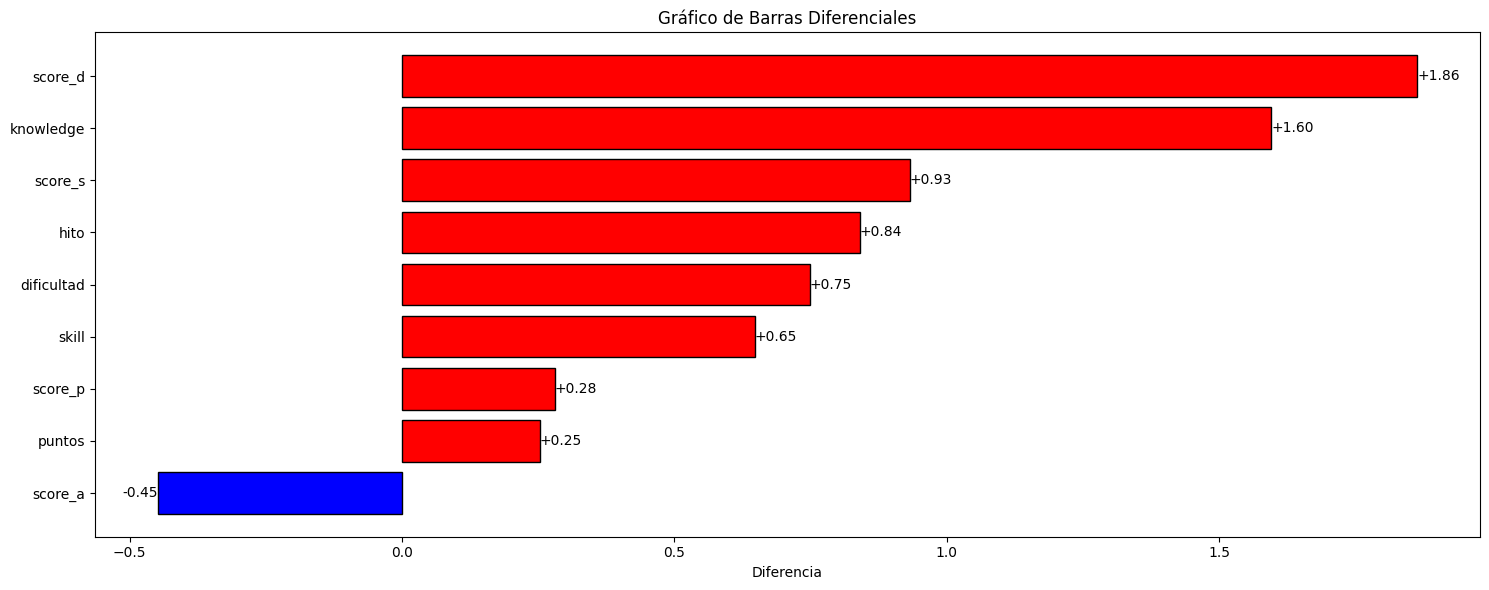

In [118]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v1_1
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

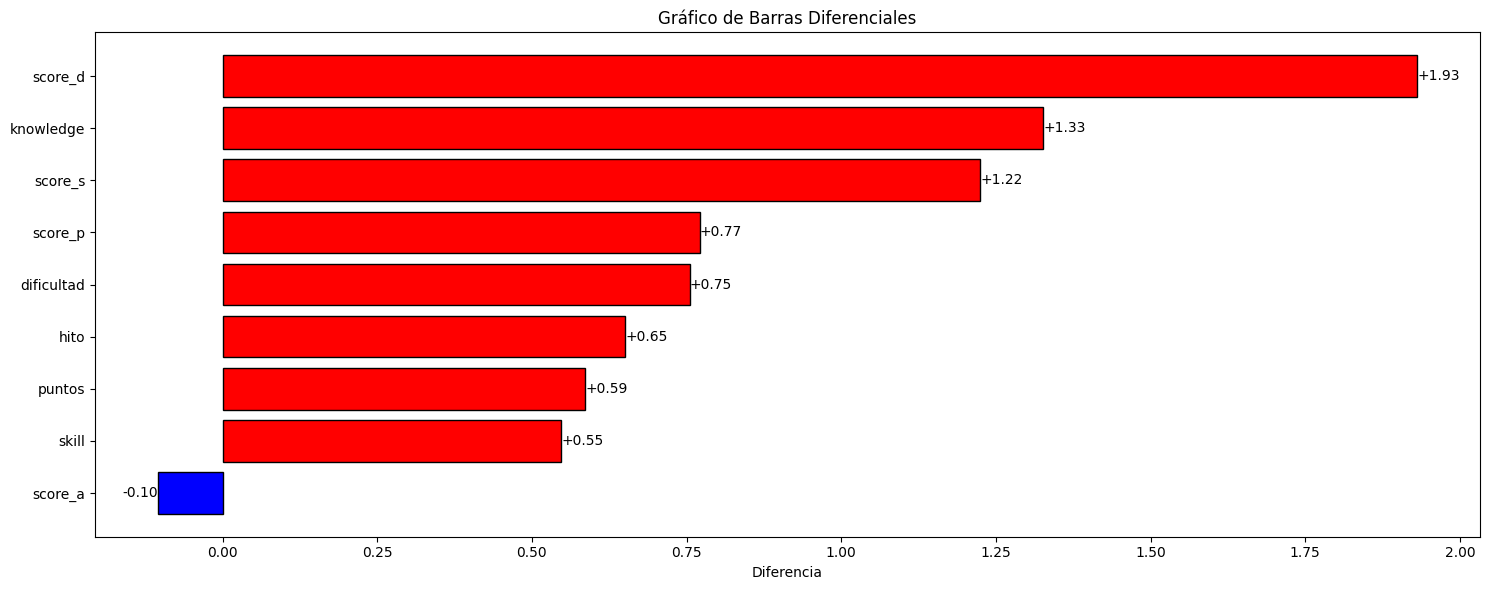

In [119]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v1_2
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

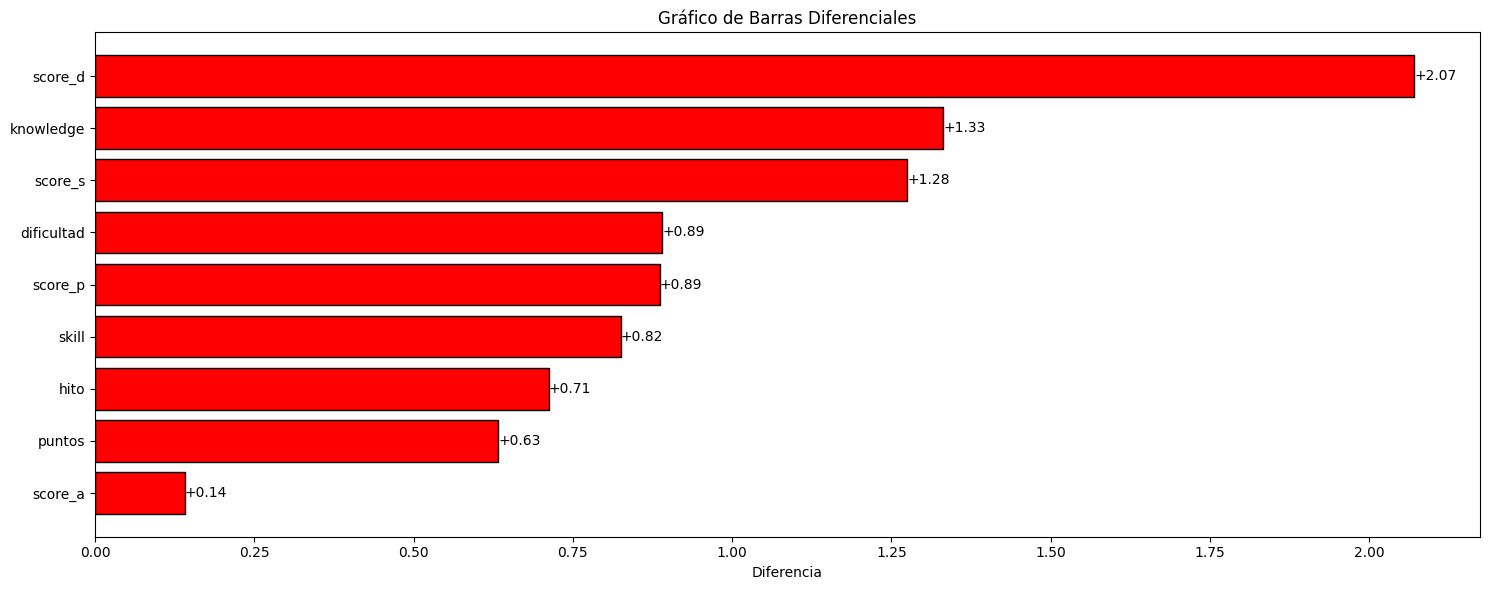

In [120]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v1_3
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

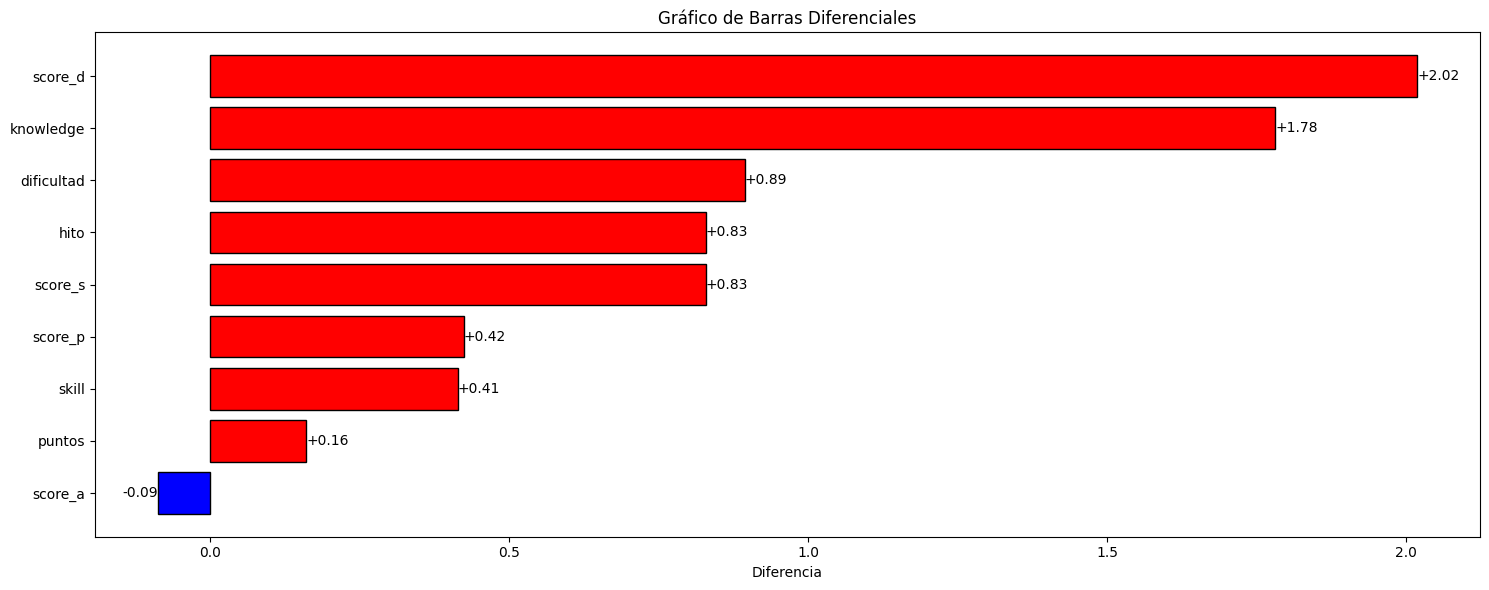

In [121]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v2_1
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

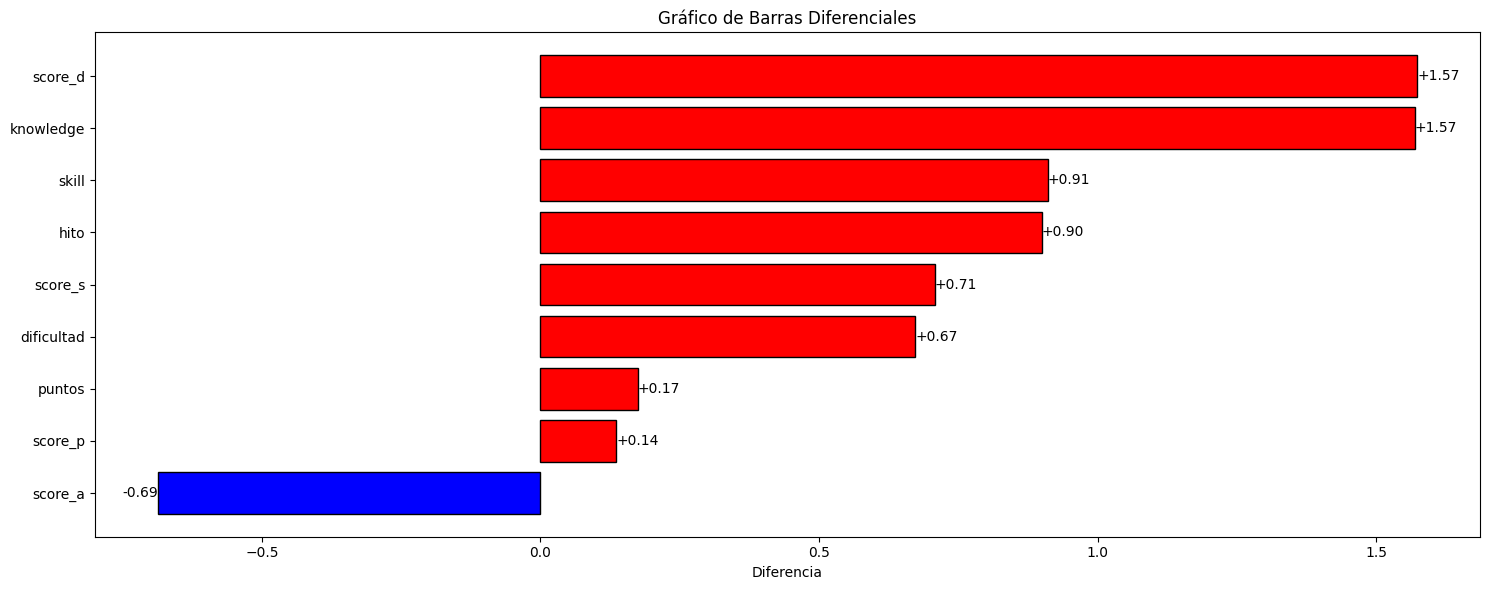

In [122]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v2_2
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

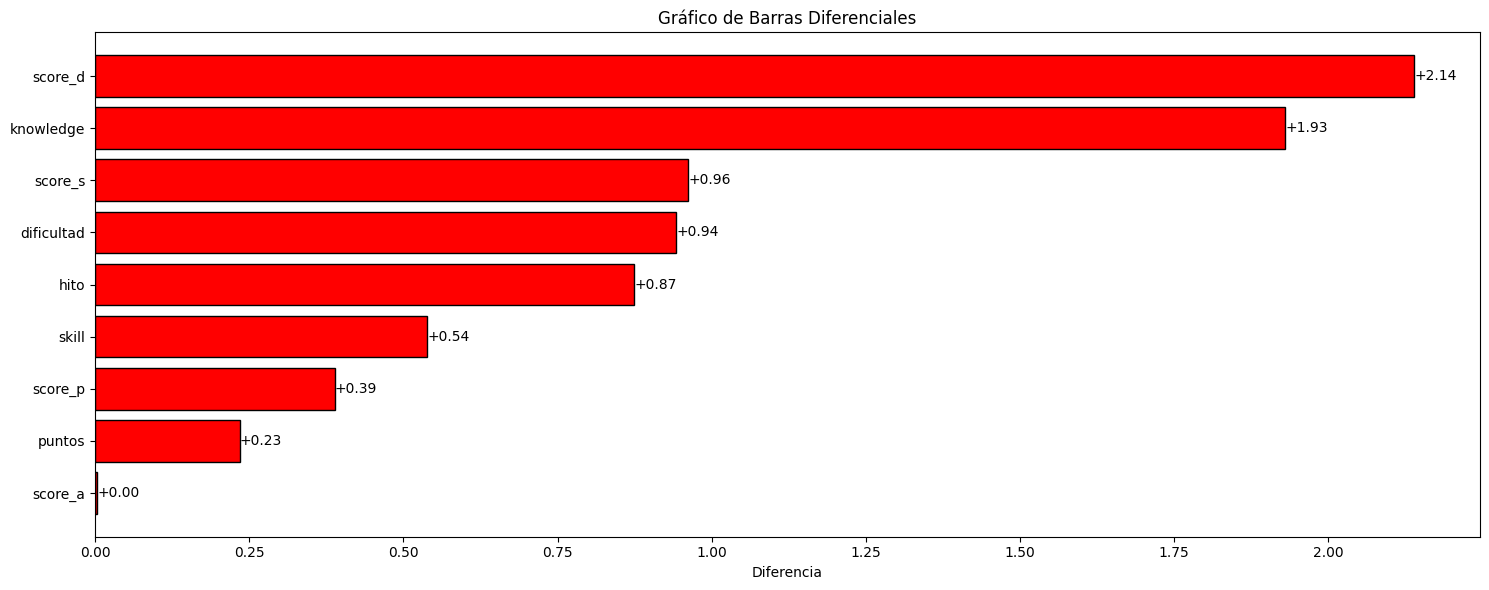

In [123]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v2_3
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

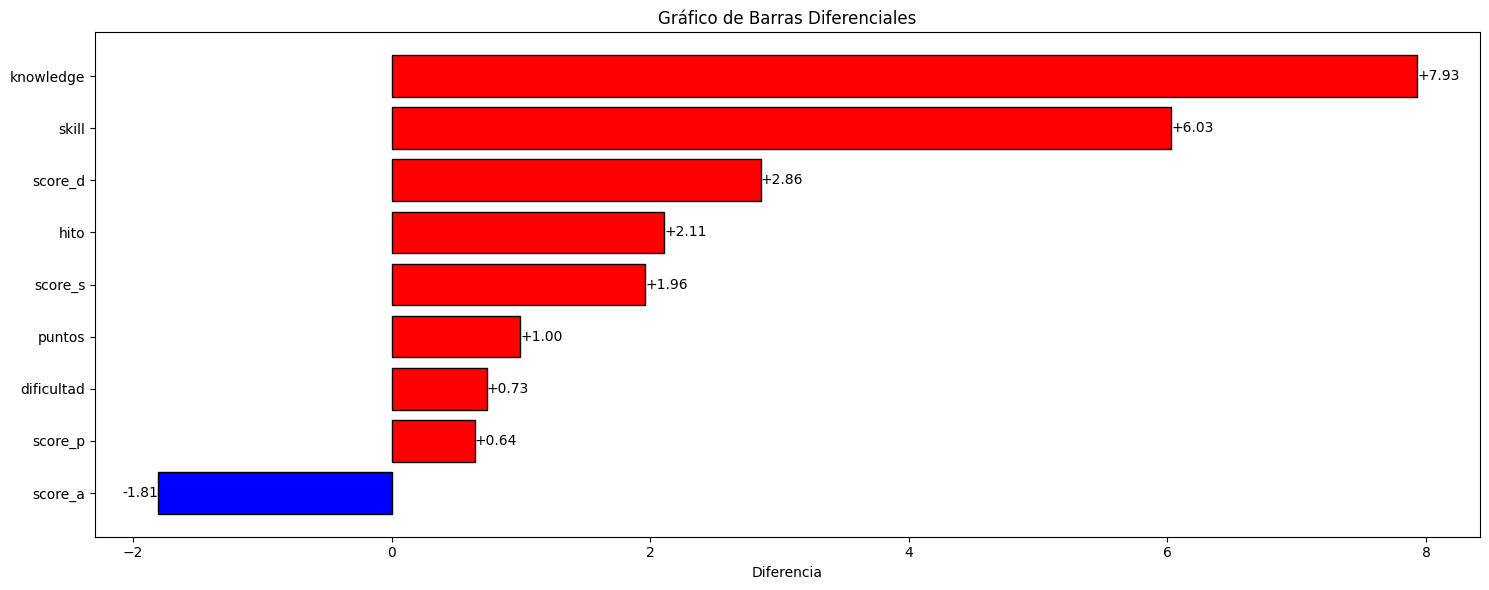

In [124]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v3_1
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

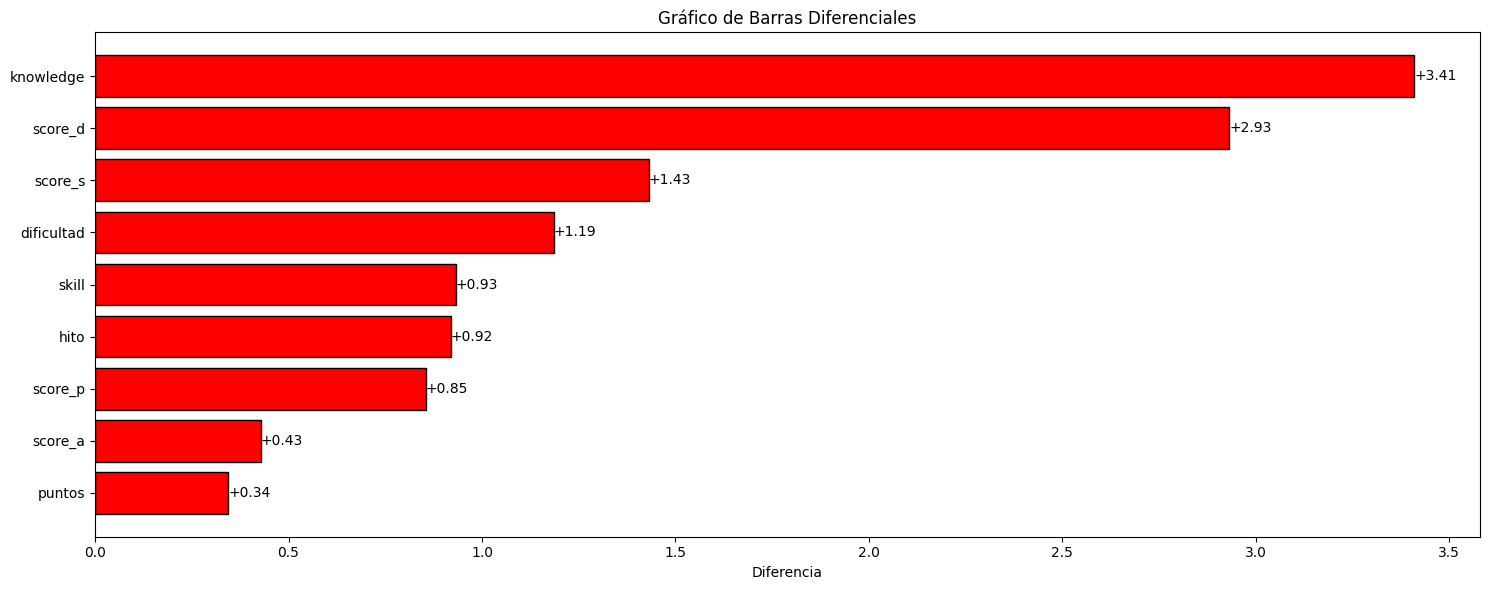

In [125]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v3_2
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

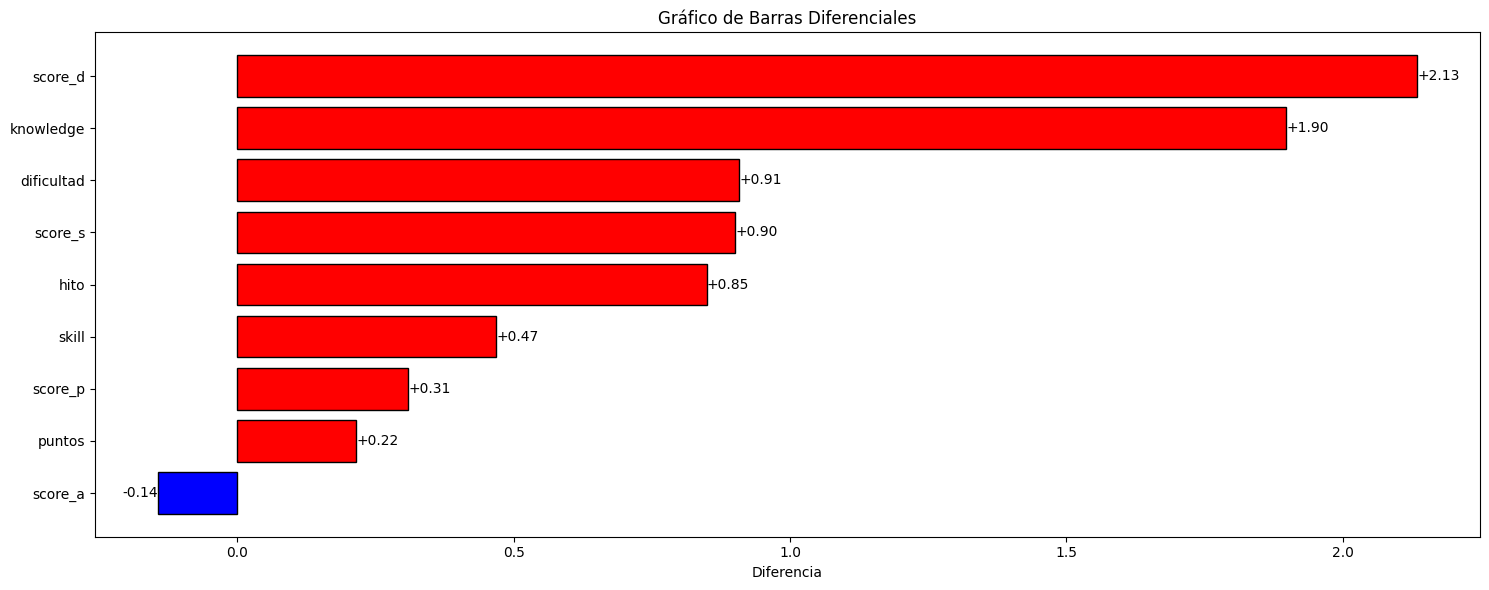

In [126]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v3_3
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

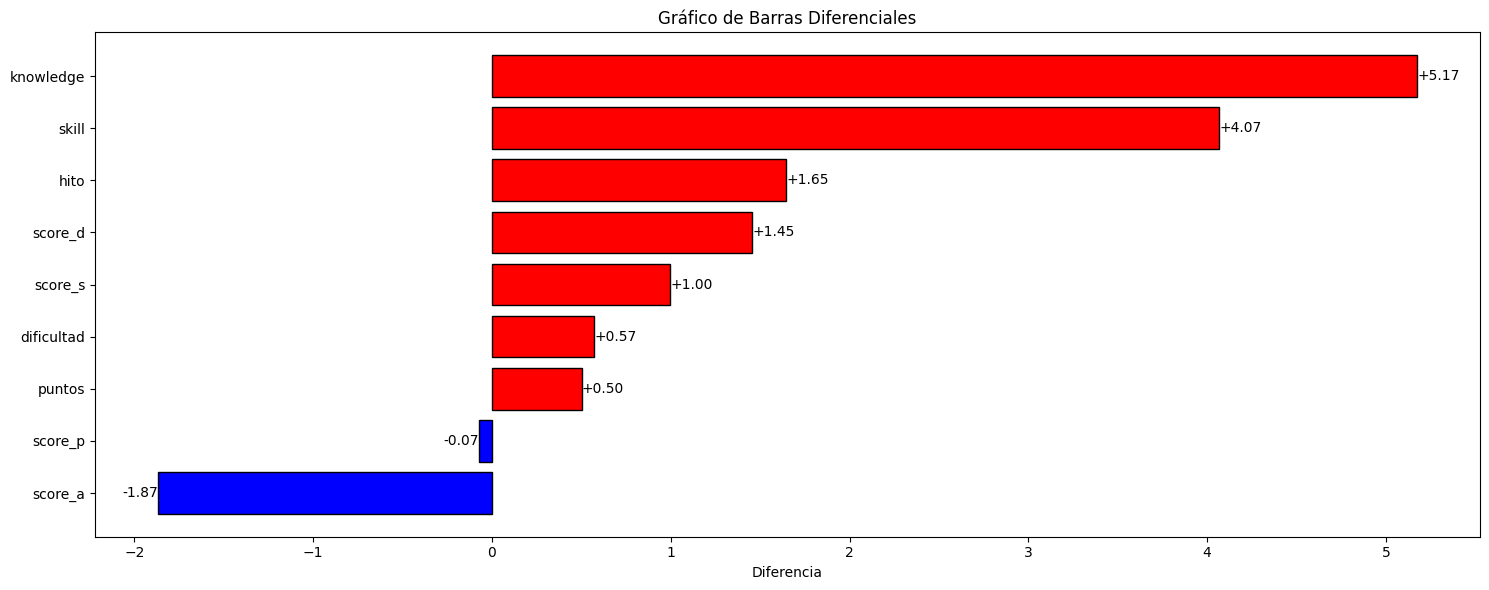

In [127]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v4_1
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

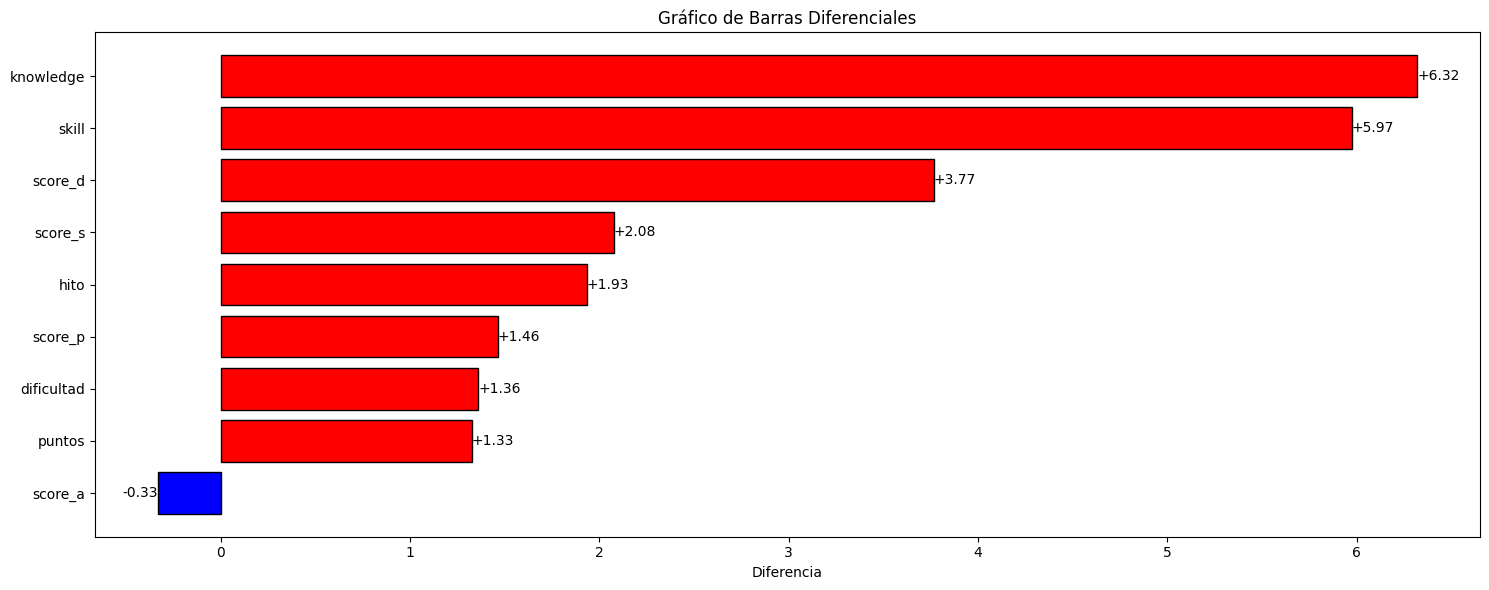

In [128]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v4_2
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

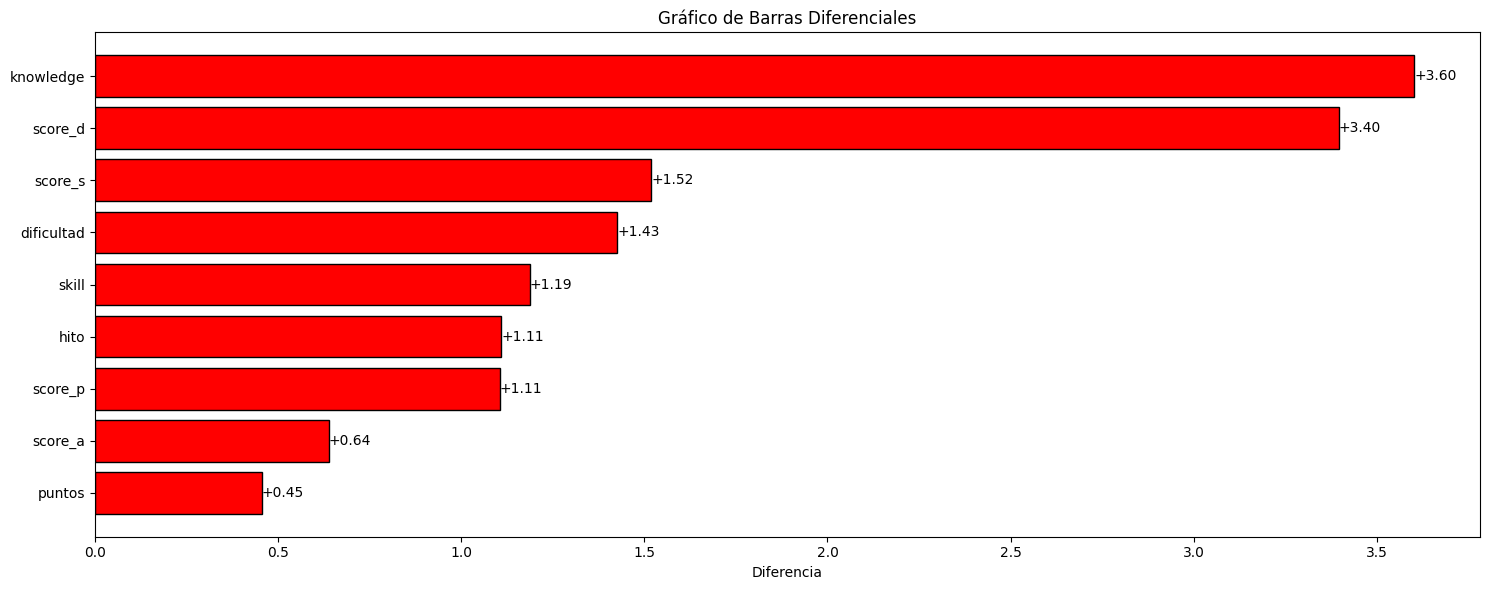

In [129]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v4_3
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

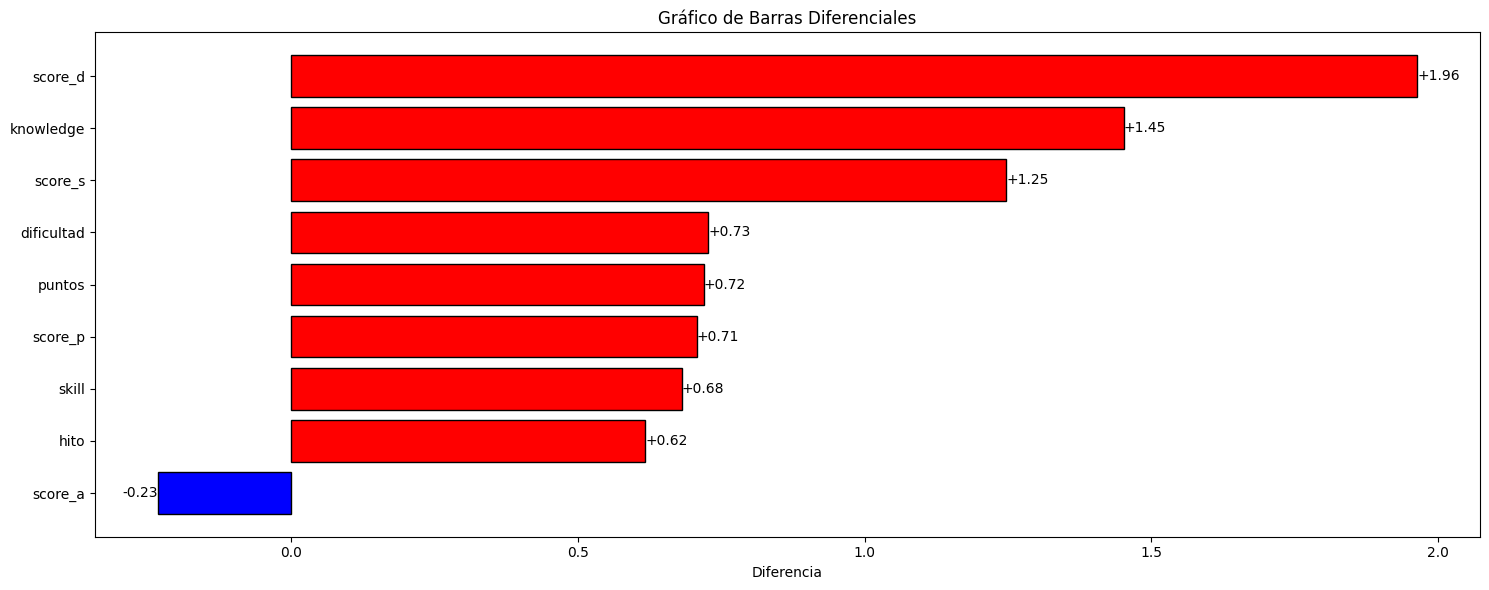

In [130]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v5_1
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

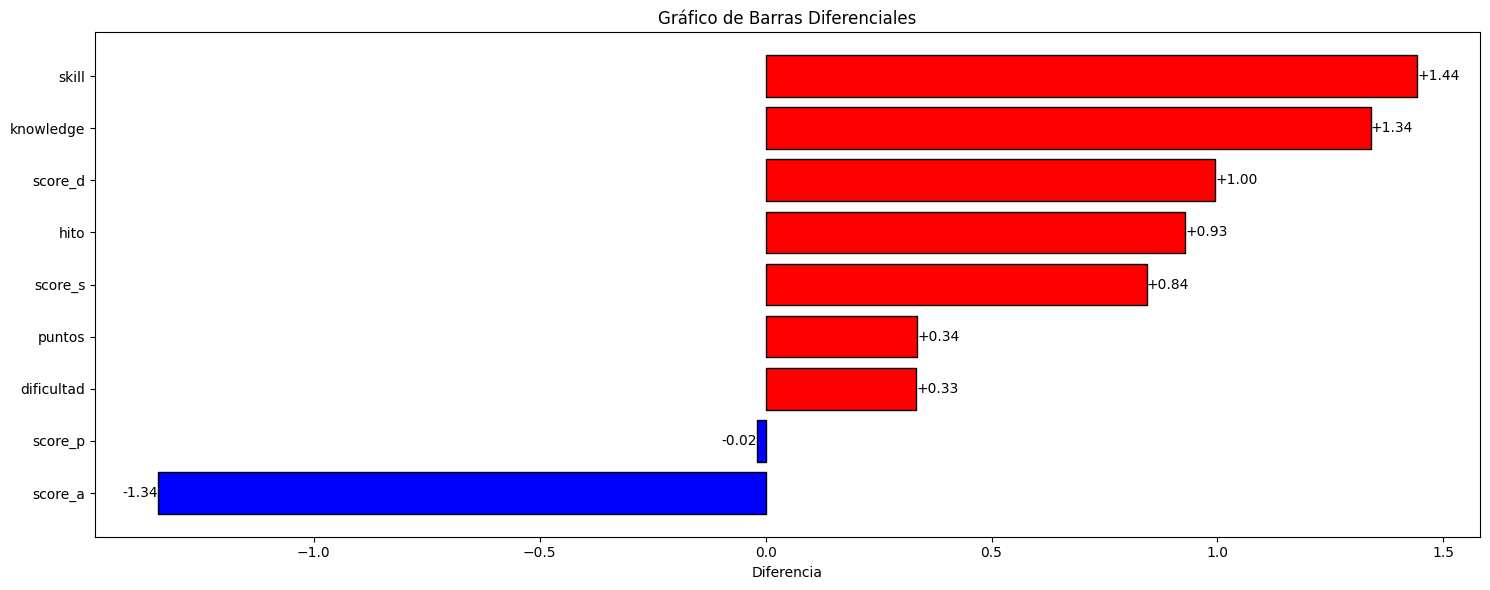

In [131]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v5_2
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

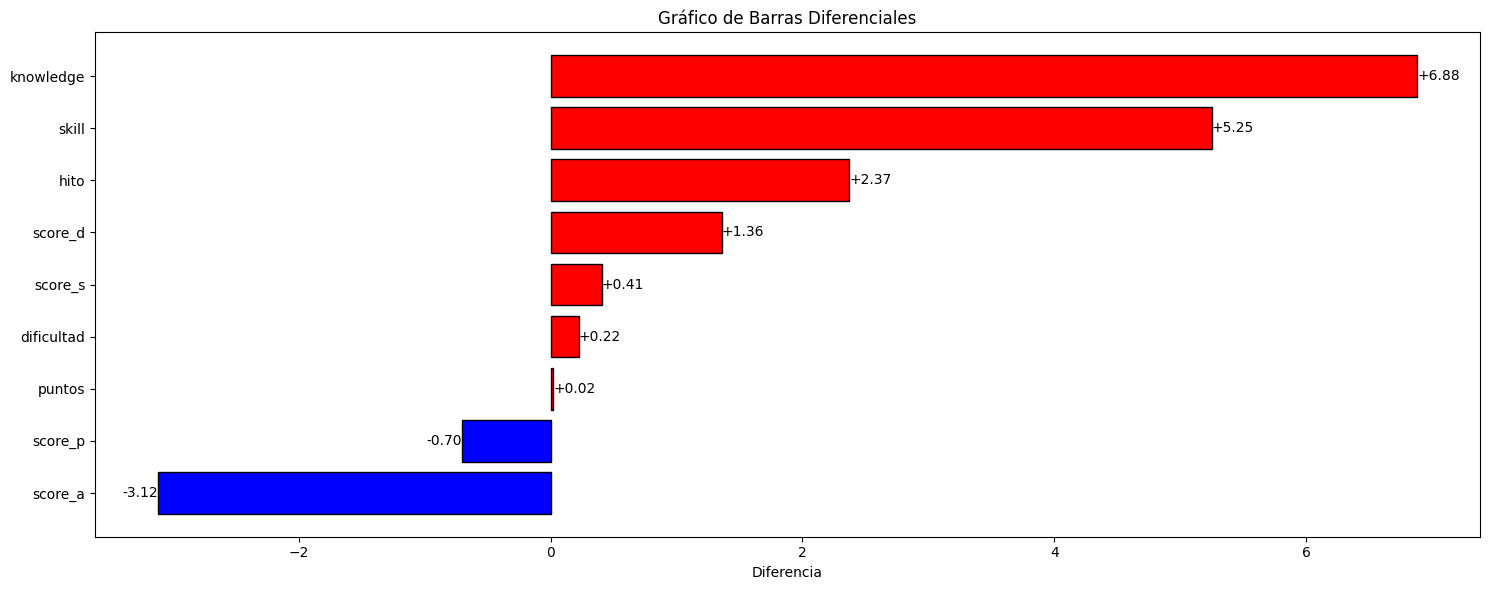

In [132]:
df_resultados_recomendaciones = diferencias_resultados_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_usuarios=df_test_users,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v5_3
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title('Gráfico de Barras Diferenciales')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:

#  ██████╗ ███████╗ ██████╗ ██████╗ ███╗   ███╗███████╗███╗   ██╗██████╗  █████╗  ██████╗██╗ ██████╗ ███╗   ██╗███████╗███████╗
#  ██╔══██╗██╔════╝██╔════╝██╔═══██╗████╗ ████║██╔════╝████╗  ██║██╔══██╗██╔══██╗██╔════╝██║██╔═══██╗████╗  ██║██╔════╝██╔════╝
#  ██████╔╝█████╗  ██║     ██║   ██║██╔████╔██║█████╗  ██╔██╗ ██║██║  ██║███████║██║     ██║██║   ██║██╔██╗ ██║█████╗  ███████╗
#  ██╔══██╗██╔══╝  ██║     ██║   ██║██║╚██╔╝██║██╔══╝  ██║╚██╗██║██║  ██║██╔══██║██║     ██║██║   ██║██║╚██╗██║██╔══╝  ╚════██║
#  ██║  ██║███████╗╚██████╗╚██████╔╝██║ ╚═╝ ██║███████╗██║ ╚████║██████╔╝██║  ██║╚██████╗██║╚██████╔╝██║ ╚████║███████╗███████║
#  ╚═╝  ╚═╝╚══════╝ ╚═════╝ ╚═════╝ ╚═╝     ╚═╝╚══════╝╚═╝  ╚═══╝╚═════╝ ╚═╝  ╚═╝ ╚═════╝╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝╚══════╝

#  ██╗███╗   ██╗██████╗ ██╗██╗   ██╗██╗██████╗ ██╗   ██╗ █████╗ ██╗     ███████╗███████╗
#  ██║████╗  ██║██╔══██╗██║██║   ██║██║██╔══██╗██║   ██║██╔══██╗██║     ██╔════╝██╔════╝
#  ██║██╔██╗ ██║██║  ██║██║██║   ██║██║██║  ██║██║   ██║███████║██║     █████╗  ███████╗
#  ██║██║╚██╗██║██║  ██║██║╚██╗ ██╔╝██║██║  ██║██║   ██║██╔══██║██║     ██╔══╝  ╚════██║
#  ██║██║ ╚████║██████╔╝██║ ╚████╔╝ ██║██████╔╝╚██████╔╝██║  ██║███████╗███████╗███████║
#  ╚═╝╚═╝  ╚═══╝╚═════╝ ╚═╝  ╚═══╝  ╚═╝╚═════╝  ╚═════╝ ╚═╝  ╚═╝╚══════╝╚══════╝╚══════╝

In [141]:
def diferencias_recomendaciones(columnas: list[str], df_ejercicios: pd.DataFrame, df_interacciones: pd.DataFrame, items_recomendados: dict[int, list], usuario_id: int):
    
    df_ejercicios_copia = df_ejercicios[['id_ejercicio'] + columnas]
    df_resultados_recomendaciones = pd.DataFrame(columns=columnas)

    interacciones = [i for i, interaccion in enumerate(df_interacciones[df_interacciones['id_estudiante'] == usuario_id].iloc[:, 1:].values.flatten()) if interaccion == 1]

    ejercicios_realizados = df_ejercicios_copia[df_ejercicios_copia['id_ejercicio'].isin(interacciones)]

    recomendaciones = df_ejercicios_copia[df_ejercicios_copia['id_ejercicio'].isin(items_recomendados.get(usuario_id))]

    ejericios_realizados_media = ejercicios_realizados.select_dtypes(include='number').mean().to_frame().T
    recomendaciones_media = recomendaciones.select_dtypes(include='number').mean().to_frame().T

    df_diferencia = recomendaciones_media - ejericios_realizados_media
    df_diferencia = df_diferencia.drop(labels=['id_ejercicio'], axis=1)
    valores_diferencia = df_diferencia.values.flatten().tolist()

    fila = dict(zip(columnas, valores_diferencia))
    df_resultados_recomendaciones = pd.concat([df_resultados_recomendaciones, pd.DataFrame([fila])], ignore_index=True)

    return df_resultados_recomendaciones

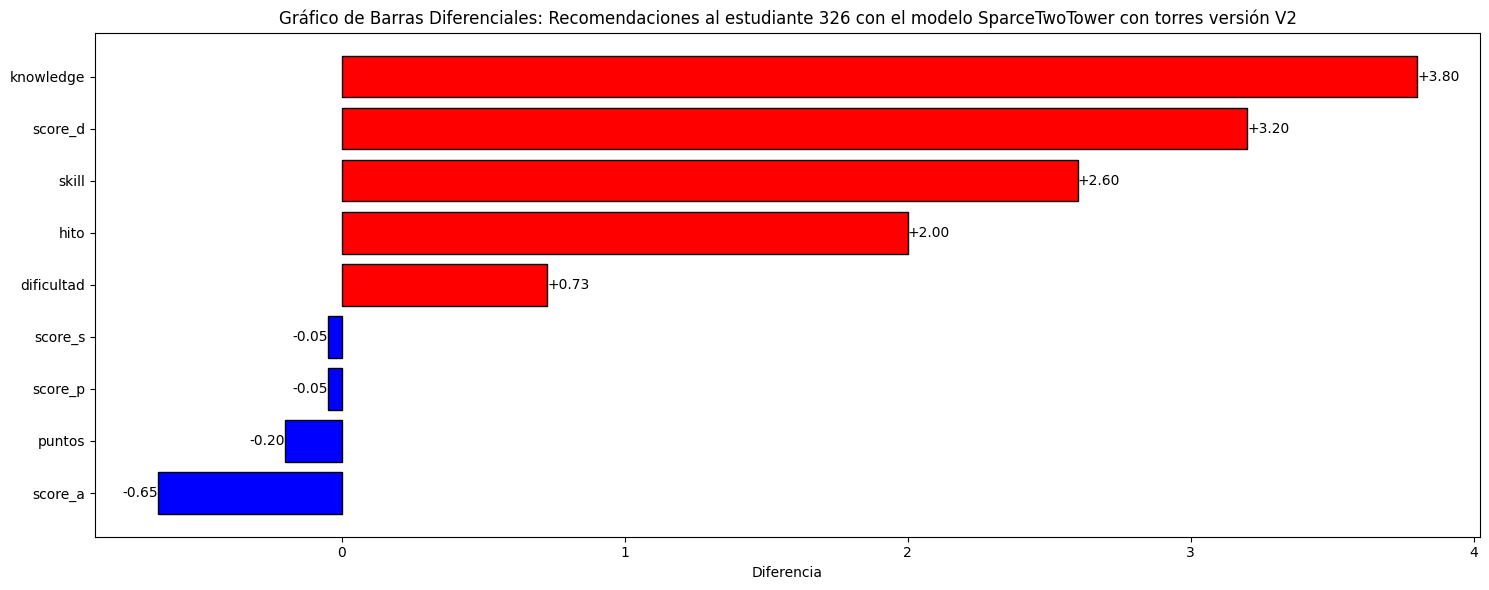

In [145]:
usuario_id = 326 # 275, 1221, 1097,908, 326, 1135

df_resultados_recomendaciones = diferencias_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v5_2,
    usuario_id=usuario_id
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title(f'Gráfico de Barras Diferenciales: Recomendaciones al estudiante {usuario_id} con el modelo SparceTwoTower con torres versión V2')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

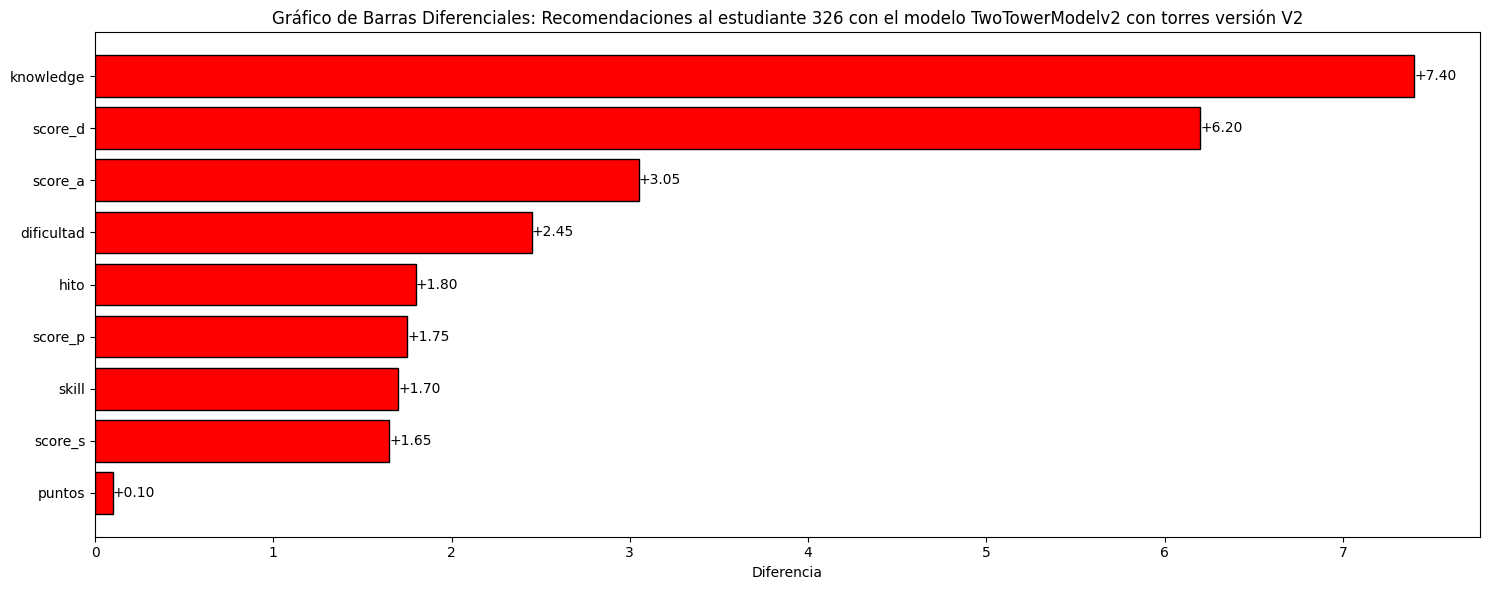

In [147]:
usuario_id = 326 # 275, 1221, 1097,908, 326, 1135

df_resultados_recomendaciones = diferencias_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v3_2,
    usuario_id=usuario_id
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title(f'Gráfico de Barras Diferenciales: Recomendaciones al estudiante {usuario_id} con el modelo TwoTowerModelv2 con torres versión V2')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

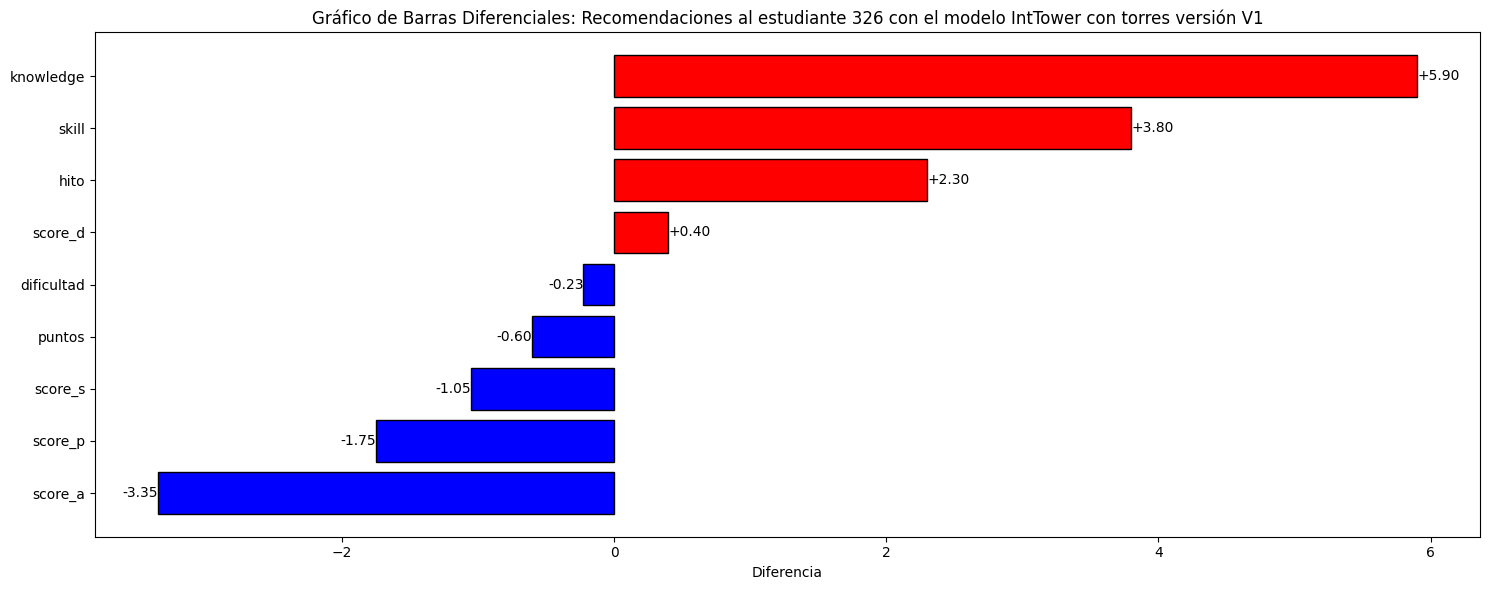

In [160]:
usuario_id = 326 # 275, 1221, 1097,908, 326, 1135

df_resultados_recomendaciones = diferencias_recomendaciones(
    columnas=['hito', 'skill', 'knowledge', 'puntos', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s'],
    df_ejercicios=EJERCICIOS,
    df_interacciones=df_test_interacciones,
    items_recomendados=recommended_items_v4_1,
    usuario_id=usuario_id
)

import matplotlib.pyplot as plt
import numpy as np

variables = df_resultados_recomendaciones.columns.to_list()
diferencias = df_resultados_recomendaciones.mean().values

orden = np.argsort(diferencias)
variables_ordenadas = np.array(variables)[orden]
diferencias_ordenadas = np.array(diferencias)[orden]

fig, ax = plt.subplots(figsize=(15, 6))
colores = ['red' if val > 0 else 'blue' for val in diferencias_ordenadas]
y_pos = np.arange(len(variables))
ax.barh(y_pos, diferencias_ordenadas, color=colores, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables_ordenadas)
ax.set_xlabel('Diferencia')
ax.set_title(f'Gráfico de Barras Diferenciales: Recomendaciones al estudiante {usuario_id} con el modelo IntTower con torres versión V1')

for i, val in enumerate(diferencias_ordenadas):
    ax.text(val, i, f'{val:+.2f}', va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()